# ReCell 

### Background:
ReCell, a startup dealing with refurbished and used mobile devices is aiming to tap the potential in this market. They want to analyze the data provided and build a linear regression model to predict the price of a used phone and identify factors that significantly influence it.

### Objective:
The rising potential of refurbished and used mobile devices market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished smartphones

### Questions:

- 1/ What does the distribution of used phone prices look like?

- 2/ What percentage of the used phone market is dominated by Android devices?

- 3/ The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?

- 4/ A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for    
    phones offering large batteries (more than 4500 mAh)?
    
- 5/ Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are 
    available across different brands with a screen size larger than 6 inches?
    
- 6/ Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the 
    distribution of budget phones offering greater than 8MP selfie cameras across brands?
    
- 7/ Which attributes are highly correlated with the used phone price?

### Data Description:

* 1.  brand_name:        Name of manufacturing brand
* 2.  os:                OS on which the phone runs
* 3.  screen_size:      Size of the screen in cm
* 4.  4g:               Whether 4G is available or not
* 5.  5g:               Whether 5G is available or not
* 6.  main_camera_mp:   Resolution of the rear camera in megapixels
* 7.  selfie_camera_mp: Resolution of the front camera in megapixels
* 8.  int_memory:       Amount of internal memory (ROM) in GB
* 9.  ram:              Amount of RAM in GB
* 10. battery:          Energy capacity of the phone battery in mAh
* 11. weight:           Weight of the phone in grams
* 12. release_year:     Year when the phone model was released
* 13. days_used:        Number of days the used/refurbished phone has been used
* 14. new_price:        Price of a new phone of the same model in euros
* 15. used_price:       Price of the used/refurbished phone in euros

## Importing necessary libraries and data

In [162]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="darkgrid")



#supress warnings on depreceated features
import warnings
warnings.filterwarnings("ignore")

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

In [163]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', 200)

### Read the dataset

In [164]:
# loading the dataset
data = pd.read_csv("used_phone_data.csv")

In [165]:
df = data.copy()

In [166]:
np.random.seed(1)
data.sample(200)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
2501,Samsung,Android,13.49,yes,no,13.00,13.0,32.0,4.00,3600.0,181.00,2017,683,198.6800,79.47
2782,Sony,Android,13.81,yes,no,NaN,8.0,32.0,4.00,3300.0,156.00,2019,195,198.1500,149.10
605,Others,Android,12.70,yes,no,8.00,5.0,16.0,4.00,2400.0,137.00,2015,1048,161.4700,48.39
2923,Vivo,Android,19.37,yes,no,13.00,16.0,64.0,4.00,3260.0,149.30,2019,375,211.8800,138.31
941,Others,Others,5.72,no,no,0.30,0.3,32.0,0.25,820.0,90.00,2013,883,29.8100,8.92
1833,LG,Android,13.49,no,no,8.00,1.3,32.0,4.00,3140.0,161.00,2013,670,240.5400,96.18
671,Apple,iOS,14.92,yes,no,12.00,7.0,64.0,4.00,5493.0,48.00,2018,403,700.1500,350.08
1796,LG,Android,17.78,yes,no,5.00,0.3,16.0,4.00,4000.0,294.80,2014,708,189.3000,75.94
757,Asus,Android,13.49,yes,no,13.00,8.0,32.0,4.00,5000.0,181.00,2017,612,270.5000,108.13
3528,Realme,Android,15.72,yes,no,NaN,16.0,64.0,4.00,4035.0,184.00,2019,433,159.8850,80.00


In [167]:
# check number of rows and columns
data.shape

(3571, 15)

* The dataset has 3571 rows and 15 columns.

### Check for any missing data

In [168]:
#check for missing data
data.isna().sum().sort_values(ascending=False)

main_camera_mp      180
int_memory           10
ram                  10
weight                7
battery               6
selfie_camera_mp      2
brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

* There are missing data mainly for **main_camera_mp** and few for int_memory, ram, weight, battery and very few on  selfie_camera_mp.
* Further data analysis will need to be done for the best way to handle the missing data

### Check the info of the data

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


*  brand_name and os are of object
*  4g and 5g are also object , This can be converted to categorical
*  release_year is int64 , this needs to be converted to date type    

###  EDA

In [170]:
for col in ['4g', '5g', 'brand_name', 'os']:
    data[col] = data[col].astype('category')

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3571 non-null   category
 1   os                3571 non-null   category
 2   screen_size       3571 non-null   float64 
 3   4g                3571 non-null   category
 4   5g                3571 non-null   category
 5   main_camera_mp    3391 non-null   float64 
 6   selfie_camera_mp  3569 non-null   float64 
 7   int_memory        3561 non-null   float64 
 8   ram               3561 non-null   float64 
 9   battery           3565 non-null   float64 
 10  weight            3564 non-null   float64 
 11  release_year      3571 non-null   int64   
 12  days_used         3571 non-null   int64   
 13  new_price         3571 non-null   float64 
 14  used_price        3571 non-null   float64 
dtypes: category(4), float64(9), int64(2)
memory usage: 322.7 KB


**4g . 5g , os and brand_name are now category**

In [172]:
data[['4g', '5g']].nunique()

4g    2
5g    2
dtype: int64

##### Check the different values of 4g

In [173]:
pd.unique(data['4g'].values)

['yes', 'no']
Categories (2, object): ['yes', 'no']

##### Check the different values of 5g

In [174]:
pd.unique(data['5g'].values)

['no', 'yes']
Categories (2, object): ['no', 'yes']

In [175]:
data[['brand_name', 'os']].nunique()

brand_name    34
os             4
dtype: int64

In [176]:
data['release_year']

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
3566    2019
3567    2018
3568    2020
3569    2020
3570    2020
Name: release_year, Length: 3571, dtype: int64

In [177]:
pd.to_datetime(data['release_year']).dt.year

0       1970
1       1970
2       1970
3       1970
4       1970
        ... 
3566    1970
3567    1970
3568    1970
3569    1970
3570    1970
Name: release_year, Length: 3571, dtype: int64

##### Check the different values of brand_name

In [178]:
data.brand_name.value_counts()

Others        509
Samsung       364
Huawei        264
LG            212
Lenovo        172
ZTE           141
Xiaomi        134
Oppo          129
Asus          126
Alcatel       125
Nokia         121
Micromax      120
Honor         118
Vivo          117
HTC           110
Motorola      110
Sony           88
Meizu          62
Apple          59
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Celkon         37
Lava           36
Karbonn        30
Spice          30
Microsoft      22
OnePlus        22
Coolpad        22
BlackBerry     22
Google         15
Infinix        10
Name: brand_name, dtype: int64

* Observation: There is value of  'others'
* Samsung, Huawei and LG are the top brands in the data set       

##### Check the different values of os

In [179]:
pd.unique(data['os'].values)

['Android', 'Others', 'iOS', 'Windows']
Categories (4, object): ['Android', 'Others', 'iOS', 'Windows']

#### Change the data type to be categorical

In [180]:
for col in ['4g', '5g', 'brand_name', 'os']:
    data[col] = data[col].astype('category')

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3571 non-null   category
 1   os                3571 non-null   category
 2   screen_size       3571 non-null   float64 
 3   4g                3571 non-null   category
 4   5g                3571 non-null   category
 5   main_camera_mp    3391 non-null   float64 
 6   selfie_camera_mp  3569 non-null   float64 
 7   int_memory        3561 non-null   float64 
 8   ram               3561 non-null   float64 
 9   battery           3565 non-null   float64 
 10  weight            3564 non-null   float64 
 11  release_year      3571 non-null   int64   
 12  days_used         3571 non-null   int64   
 13  new_price         3571 non-null   float64 
 14  used_price        3571 non-null   float64 
dtypes: category(4), float64(9), int64(2)
memory usage: 322.7 KB


#### Get a summary of the data

In [182]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3571,34,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3571,4,Android,3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3571.0,NaN,NaN,NaN,14.803892,5.153092,2.7,12.7,13.49,16.51,46.36
4g,3571,2,yes,2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3571,2,no,3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3391.0,NaN,NaN,NaN,9.400454,4.818396,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3569.0,NaN,NaN,NaN,6.547352,6.879359,0.3,2.0,5.0,8.0,32.0
int_memory,3561.0,NaN,NaN,NaN,54.532607,84.696246,0.005,16.0,32.0,64.0,1024.0
ram,3561.0,NaN,NaN,NaN,4.056962,1.391844,0.03,4.0,4.0,4.0,16.0
battery,3565.0,NaN,NaN,NaN,3067.225666,1364.206665,80.0,2100.0,3000.0,4000.0,12000.0


In [183]:
data.describe(include=['category']).T

,count,unique,top,freq
brand_name,3571,34,Others,509
os,3571,4,Android,3246
4g,3571,2,yes,2359
5g,3571,2,no,3419


#### Functions for plotting

In [184]:
# function to plot a boxplot and a histogram along the same scale.

# import the library for labelling
import matplotlib.patheffects as path_effects

# import the library for labelling
import matplotlib.patheffects as path_effects

def add_median_labels(ax):
    lines = ax.get_lines()
    # determine number of lines per box (this varies with/without fliers)
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    # iterate over median lines
    for median in lines[4:len(lines):lines_per_box]:
        # display median value at center of median line
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1]-median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:.1f}', ha='center', va='center',
                       fontweight='bold', color='white', bbox=dict(facecolor='black'),size=15)
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])
            
def box_and_histogram(column,  figsize=(10,10), bins = None):
    """ Boxplot and histogram together, with median labels on boxplot
    df_series: dataframe column
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    color of mean is green and median is black
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                            ) # creating the 2 subplots
    box_plot = sns.boxplot(column, ax=ax_box2,showmeans=True, color='red')
    add_median_labels(box_plot.axes)
 

    sns.distplot(column, kde=F, bins=bins) if bins else sns.distplot(column, kde=True, ) # For histogram
    ax_hist2.axvline(np.mean(column), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(column), color='black', linestyle='-') # Add median to the histogram
    
    


### EDA

#### Univariate Analysis

In [185]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="RdYlBu",
        order=data[feature].value_counts().index
    
       
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot   
    

 Plot for 4g


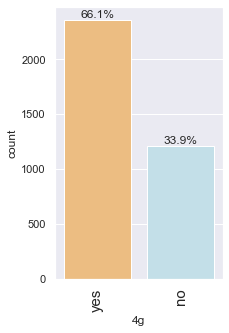

 Plot for 5g


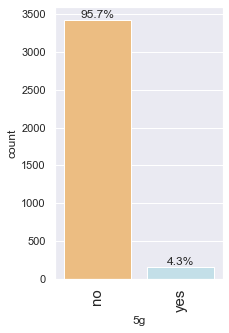

 Plot for os


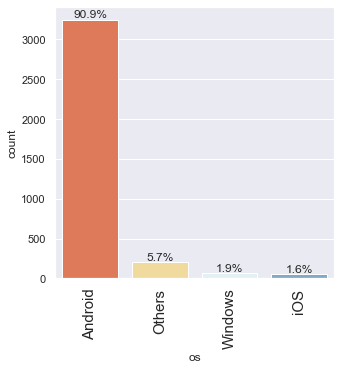

In [186]:
for col in ['4g', '5g', 'os']:
    print(' Plot for {}'.format(col))
    labeled_barplot(data, col, True) 

* Android has almost 91% share
* Most of the phones have 4G
* Most of the phones do not have 5G

#### Distribution of phones across brands

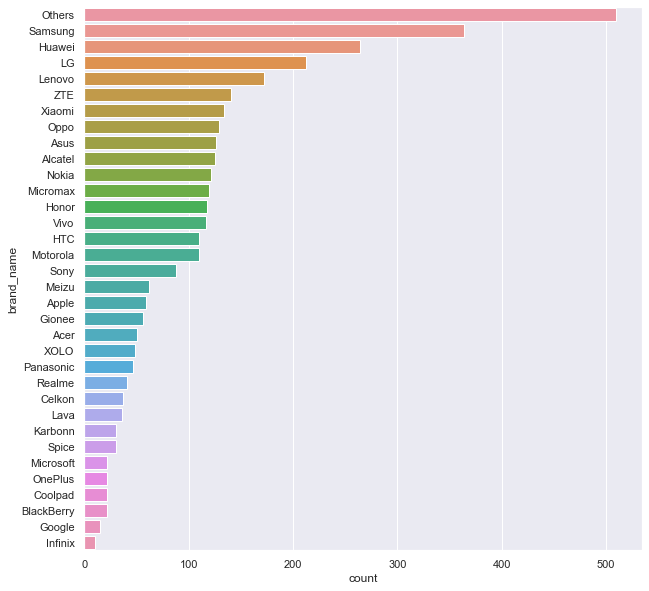

In [187]:
#sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))
sns.countplot(y=data['brand_name'], order = data['brand_name'].value_counts().index);

**Samsung, Huawei and LG are top 3 individual brands**

**There are 33 brands in total**

**Most of the phones are not from the 33 brands**

In [188]:
numeric_cols = data.select_dtypes(['int64']).columns
numeric_cols

Index(['release_year', 'days_used'], dtype='object')

In [189]:
float_cols = data.select_dtypes(['float64']).columns
float_cols

Index(['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory',
       'ram', 'battery', 'weight', 'new_price', 'used_price'],
      dtype='object')

#####  Plots for screen_size

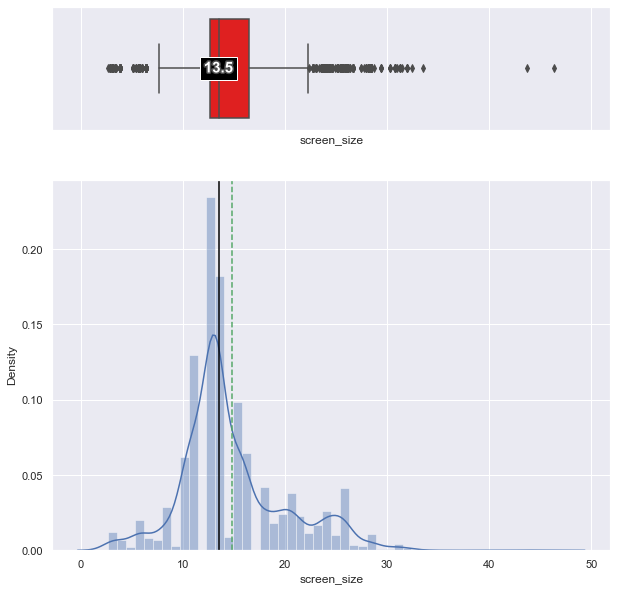

In [190]:
# Let's visualize the data for ['screen_size']
screen_size =  ['screen_size']
for col in screen_size:
    box_and_histogram(data[col])


**Observation**
* The data has 3 peaks
* Most phones have screen size of 12.5, ~13.5 followed by ~22 cms

#### Plots for 'main_camera_mp', 'selfie_camera_mp'

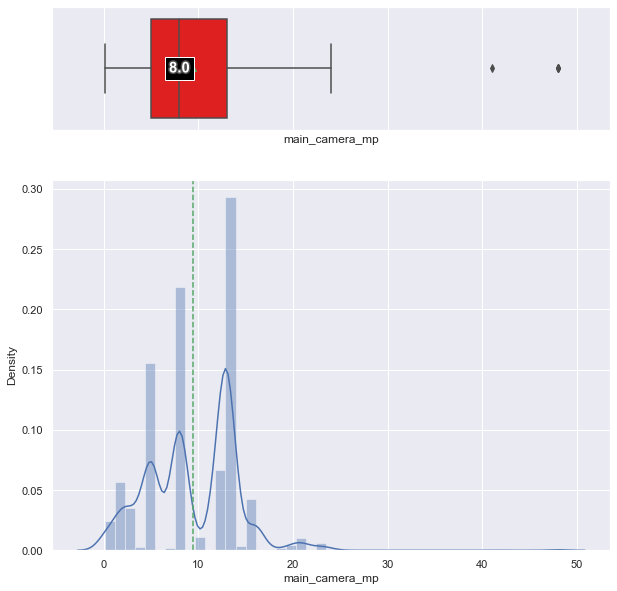

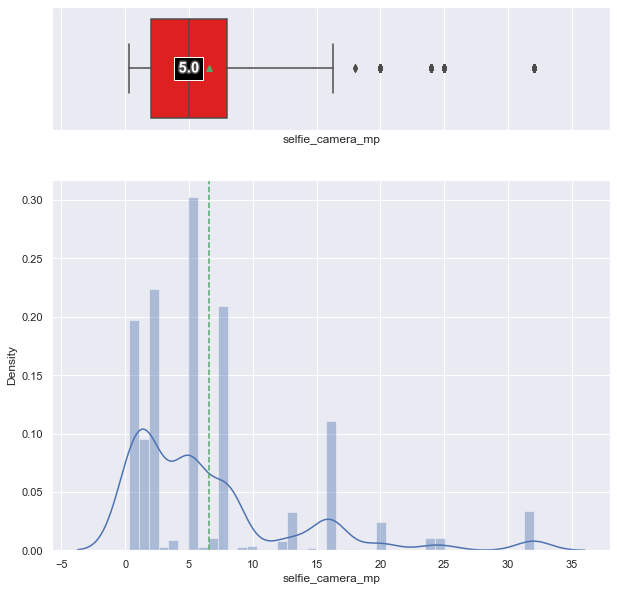

In [191]:
# Let's visualize the data for ['main_camera_mp', 'selfie_camera_mp']
camera_cols =  ['main_camera_mp', 'selfie_camera_mp']
for col in camera_cols:
    box_and_histogram(data[col])

**Observation**

* main_camera_mp: The data has 3 to 4 peaks
* selfie_camera_mp : There are several peaks, indication wide variety

#####  Plots for 'int_memory','ram'

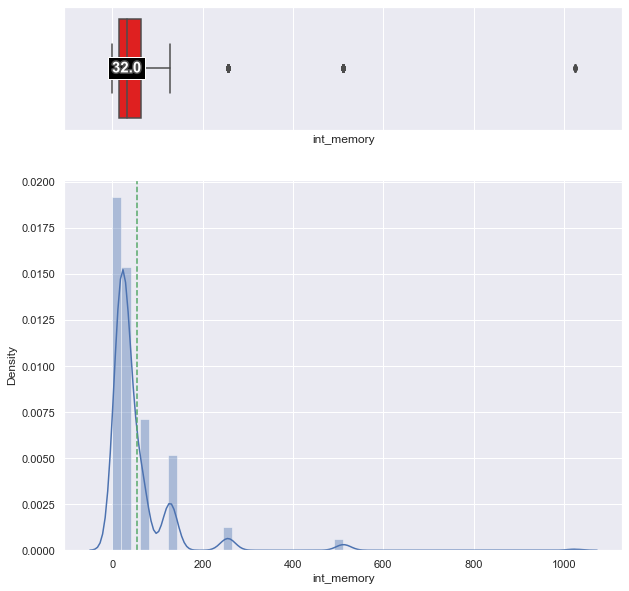

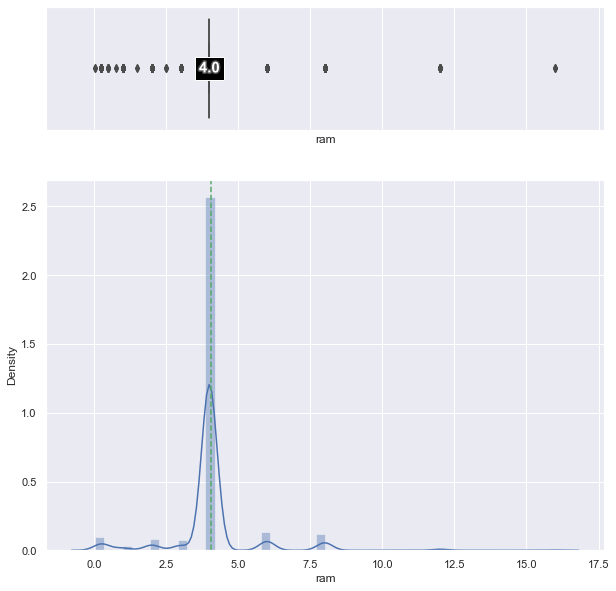

In [192]:
# Let's visualize the data for ['int_memory','ram']
int_memory_and_ram =  ['int_memory','ram']
for col in int_memory_and_ram:
    box_and_histogram(data[col])

**Observation**
* int_memory : Data is distribute around few values, indicating not many variations
* ram : Almost all phones have similar amont of Ram

#####  Plots for 'battery', 'weight'

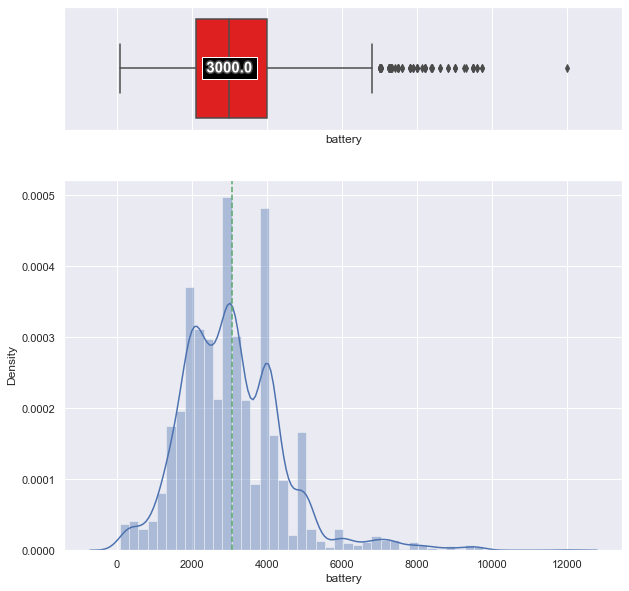

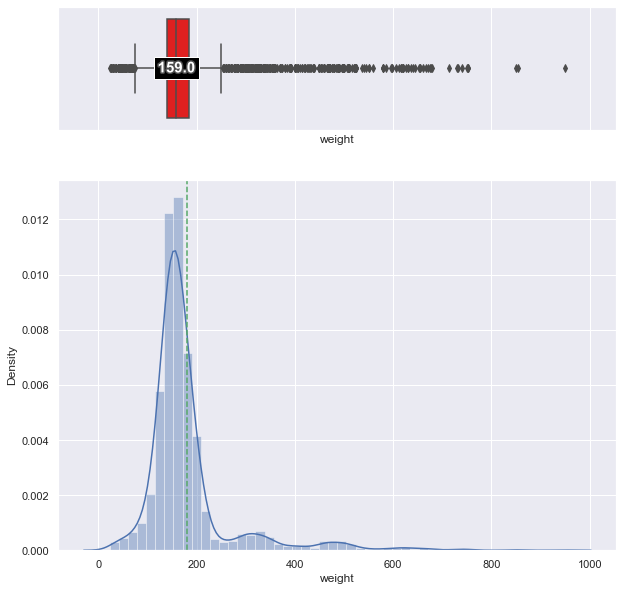

In [193]:
# Let's visualize the data for ['battery', 'weight']
clos_to_display =  ['battery', 'weight']
for col in clos_to_display:
    box_and_histogram(data[col])

**Observation**
* battery : Data is around the mean
* weight :Most of Data is around the mean

#####  Plots for 'release_year' and 'days_used'

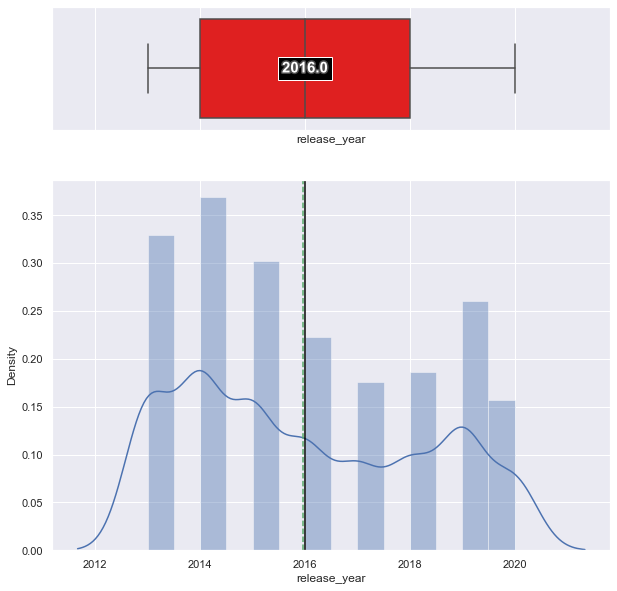

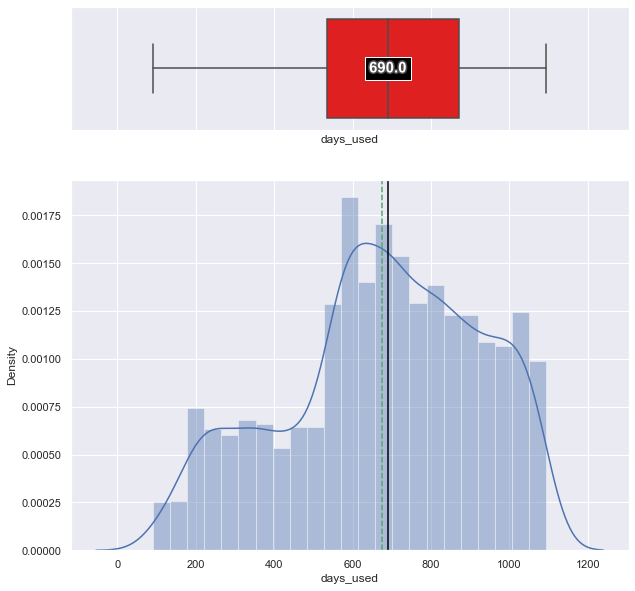

In [194]:
# Let's visualize the data for ['release_year', 'days_used']
release_year_and_days_used = ['release_year', 'days_used']
for col in release_year_and_days_used:
    box_and_histogram(data[col])

**Observataion**
* release_year : There is almost equal distribution of phones by release year except for current year, previous years and very old phones
* days_used : Most of the phones are used for more than 700 days

**Plots for new_price and used_price**

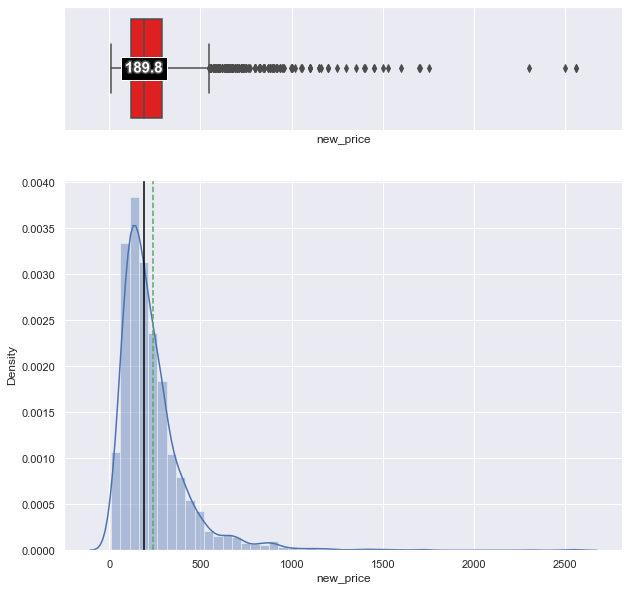

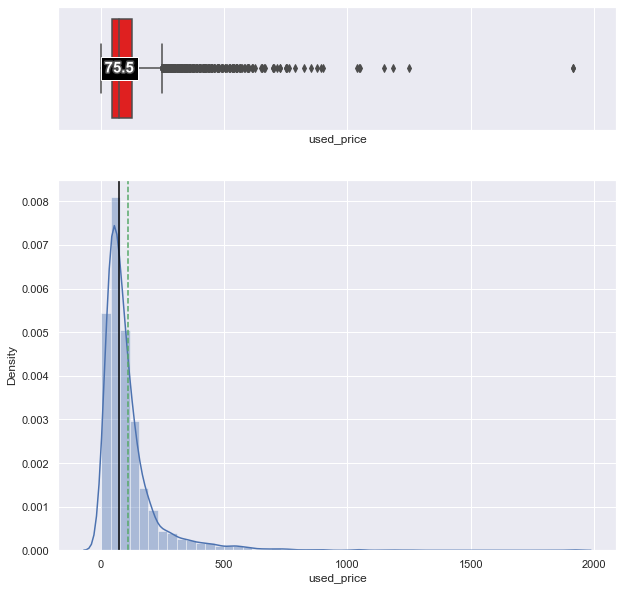

In [195]:
# Let's visualize the data for ['new_price', 'used_price']
price_cols =['new_price', 'used_price']
for col in price_cols:
    box_and_histogram(data[col])

**Observation**
* new_price: Mean is around 185 Euors
* used_price: Mean is around 65 Euors

#### Bivariate Analysis

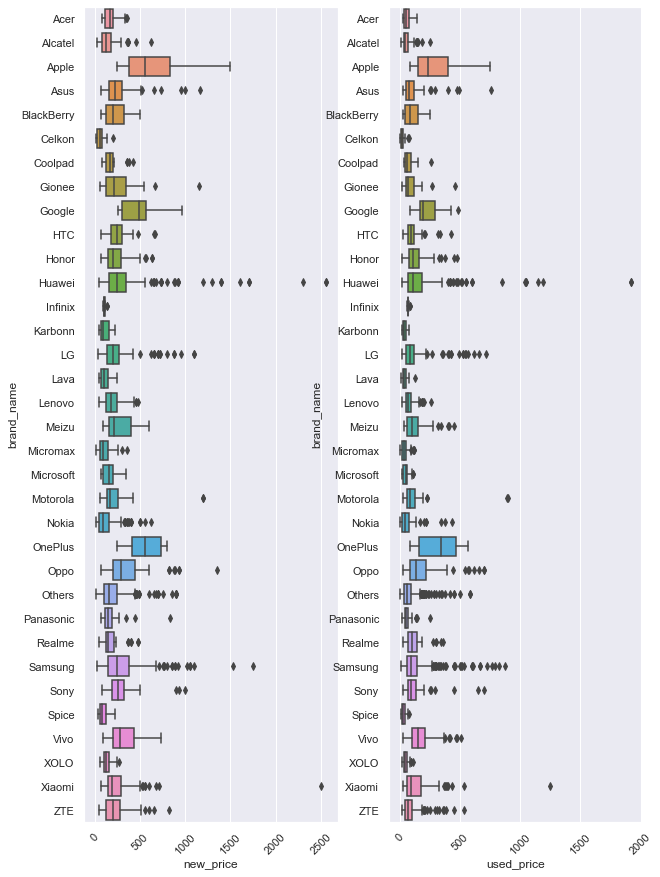

In [196]:
plt.rcParams["figure.figsize"] = (10,15)


plt.subplot(1, 2, 1)
sns.boxplot(data=data, x="new_price", y="brand_name")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=data, x="used_price", y="brand_name")
plt.xticks(rotation=45)


plt.show()

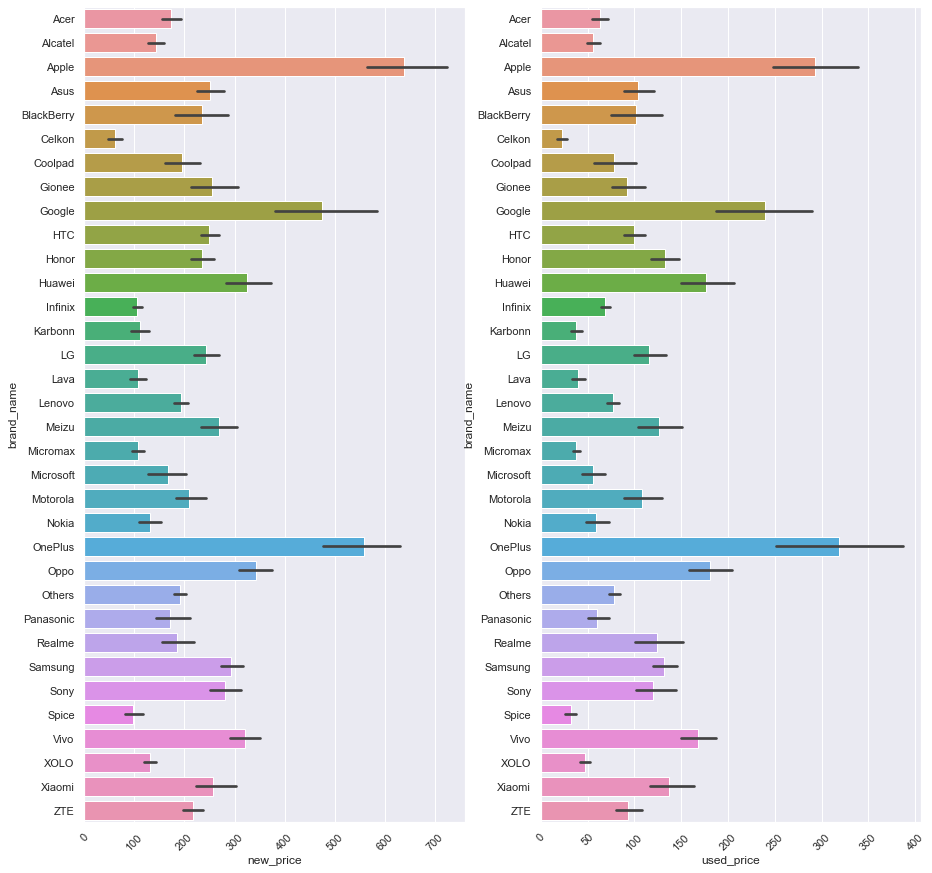

In [197]:
plt.rcParams["figure.figsize"] = (15,15)

plt.subplot(1, 2, 1)
sns.barplot(data=data, x="new_price", y="brand_name")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(data=data, x="used_price", y="brand_name")
plt.xticks(rotation=45)


plt.show()

**Observation**
* OnePlus, Apple, Google have highest mean used_price

#### brand_name Vs used_price

In [198]:
data.groupby('brand_name')['used_price'].mean().sort_values(ascending = False)

brand_name
OnePlus       318.515909
Apple         293.228814
Google        239.211333
Oppo          180.845271
Huawei        176.256894
Vivo          168.190855
Xiaomi        137.465149
Honor         132.285932
Samsung       132.083462
Meizu         126.515484
Realme        124.169024
Sony          119.886136
LG            115.853726
Motorola      107.695636
Asus          103.764921
BlackBerry    102.039091
HTC            99.626000
ZTE            93.621489
Gionee         91.881964
Others         78.492102
Coolpad        77.928182
Lenovo         77.147500
Infinix        68.979000
Acer           63.798431
Panasonic      60.302979
Nokia          59.393719
Alcatel        55.326080
Microsoft      55.316818
XOLO           47.340204
Lava           40.112778
Micromax       38.134417
Karbonn        38.069333
Spice          32.299667
Celkon         22.648378
Name: used_price, dtype: float64

#### os Vs used_price

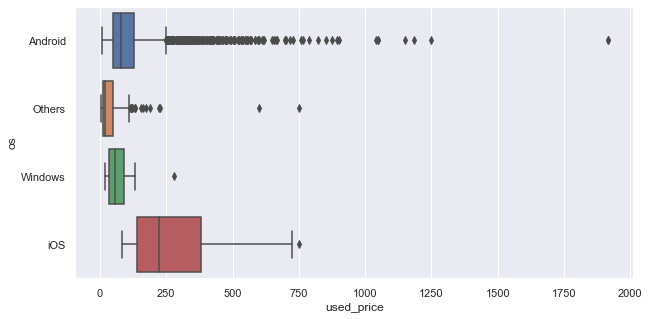

In [199]:
plt.figure(figsize=(10, 5))
sns.boxplot(data['used_price'], data['os']);

**Observation**
* Among the brands 'iOS' has the highest priced phones
* Android phones have large outliers , indication wide variety of phones

#### battery Vs used_price

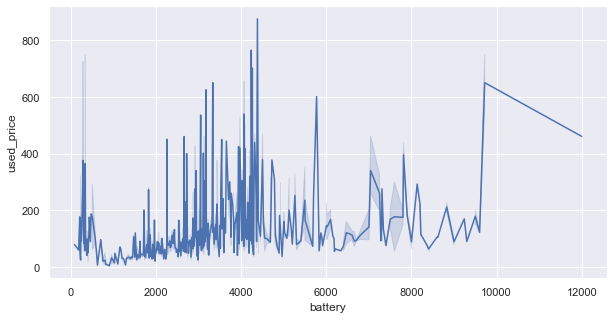

In [200]:
plt.figure(figsize=(10, 5))
sns.lineplot(y=data['used_price'], x=data['battery']);

**Observation**
* There is no clear pattern

#### Weight Vs used_price

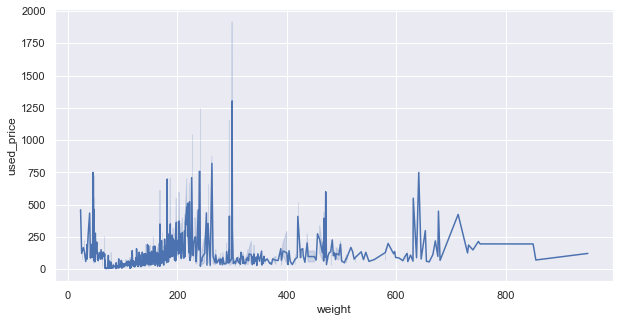

In [201]:
plt.figure(figsize=(10, 5))
sns.lineplot(y=data['used_price'], x=data['weight']);

**Observation**
* Similar to battery, there is no clear pattern

#### ram Vs used_price

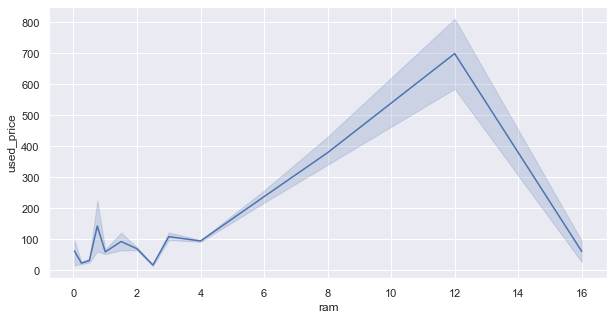

In [202]:
plt.figure(figsize=(10, 5))
sns.lineplot(y=data['used_price'], x=data['ram']);

**Observation**
* Increase in ram leads to higher used_price, but interesting that price decreases after ram size reached 12 GB

#### int_memory Vs used_price

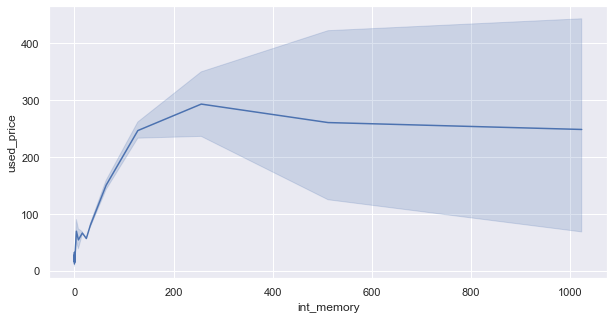

In [203]:
plt.figure(figsize=(10, 5))
sns.lineplot(y=data['used_price'], x=data['int_memory']);

**Observation**

* There is a increase of price with increase of int_memory, but the price flattens after 250 GB

#### 5g Vs used_price

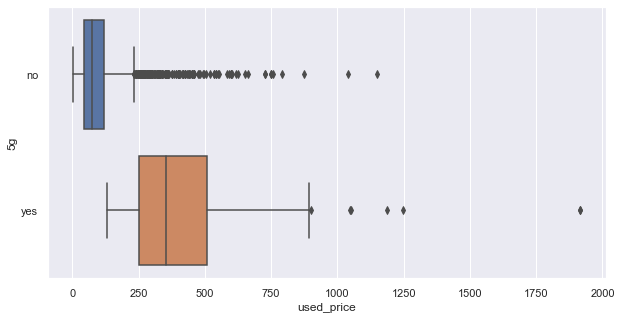

In [204]:
plt.figure(figsize=(10, 5))
sns.boxplot(data['used_price'], data['5g']);

**Observation**
* 5G phones are in general higher priced

#### 4G Vs used_price

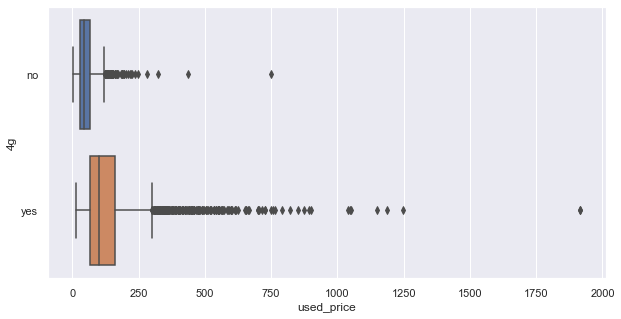

In [205]:
plt.figure(figsize=(10, 5))
sns.boxplot(data['used_price'], data['4g']);

**Observation**
* Unlike 5G, there is not considerable difference in price for phones with or with out 4G, also there are lot of outlier, indicating wide range of 4g phones

#### days_used Vs used_price

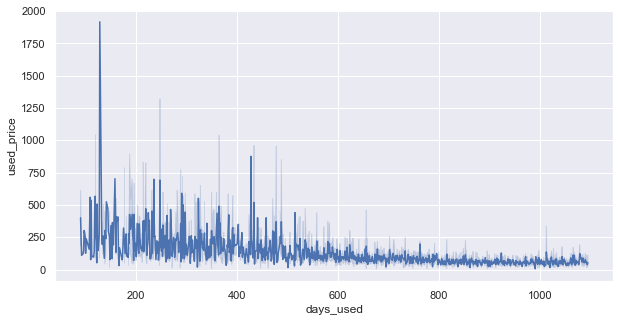

In [206]:
plt.figure(figsize=(10, 5))
sns.lineplot(y=data['used_price'], x=data['days_used']);

**Observation**
* No clear trend, but phoes use less than 200 days have a higher price

In [207]:
#### release_year Vs used_price

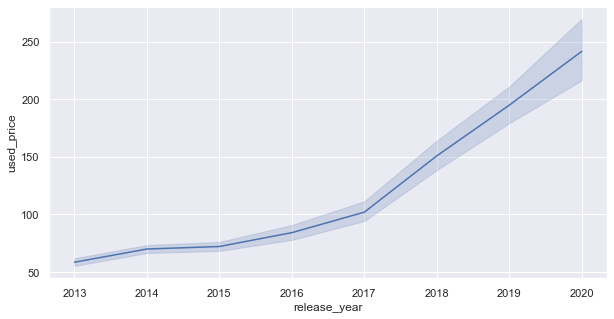

In [208]:
plt.figure(figsize=(10, 5))
sns.lineplot(y=data['used_price'], x=data['release_year']);

**Observation**
* The latest the release_year the higher the price

#### screen_size Vs used_price

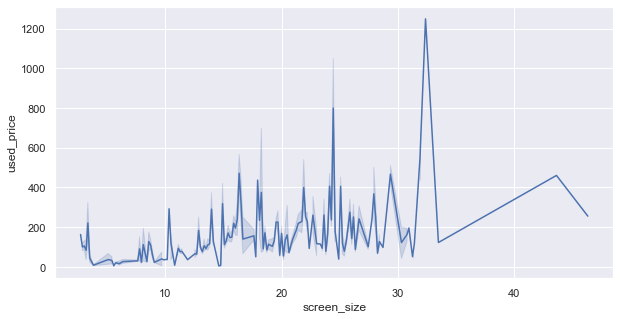

In [209]:
plt.figure(figsize=(10, 5))
sns.lineplot(y=data['used_price'], x=data['screen_size']);

**Observation**
* The bigger the screen size higher the price, there are some outliers

In [210]:
# Let us plot the corelation of numeric columns
numeric_columns = data.select_dtypes(exclude = ['category']).columns
numeric_columns

Index(['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory',
       'ram', 'battery', 'weight', 'release_year', 'days_used', 'new_price',
       'used_price'],
      dtype='object')

In [211]:
# Check for correlation among numerical variables
num_var = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory',
       'ram', 'battery', 'weight', 'release_year', 'days_used', 'new_price',
       'used_price']

corr = data[num_var].corr()

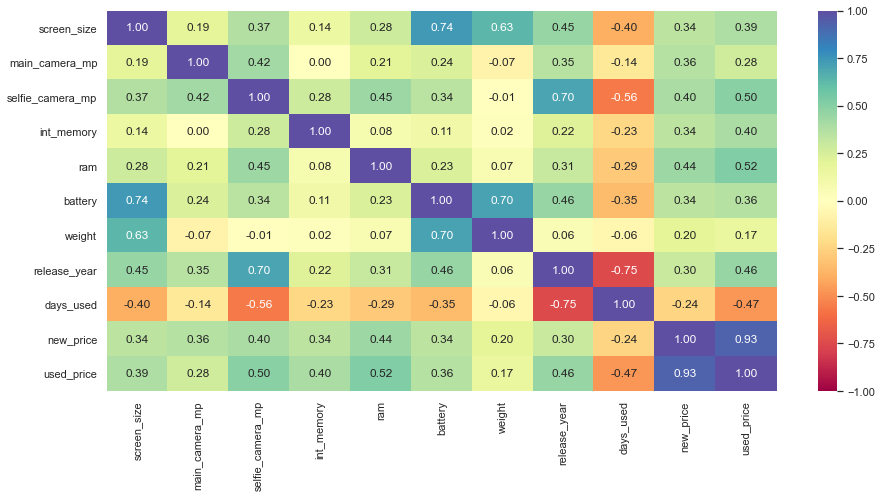

In [212]:
# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[num_var].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

**Observation**
* Battery and weight are corelated , as expected.
* Screen_size and battery are corelated , indicating large screen size needs large batteries.
* selfie_camera_mp and release_year are corelated , indicating new models have better selfie cameras.
* Days_used and used_price are negatively corelated.

###### Let us check possible Multicollinearity

In [213]:
poss_Multicollinearity = ['main_camera_mp', 'selfie_camera_mp', 'int_memory',
       'ram', 'used_price']

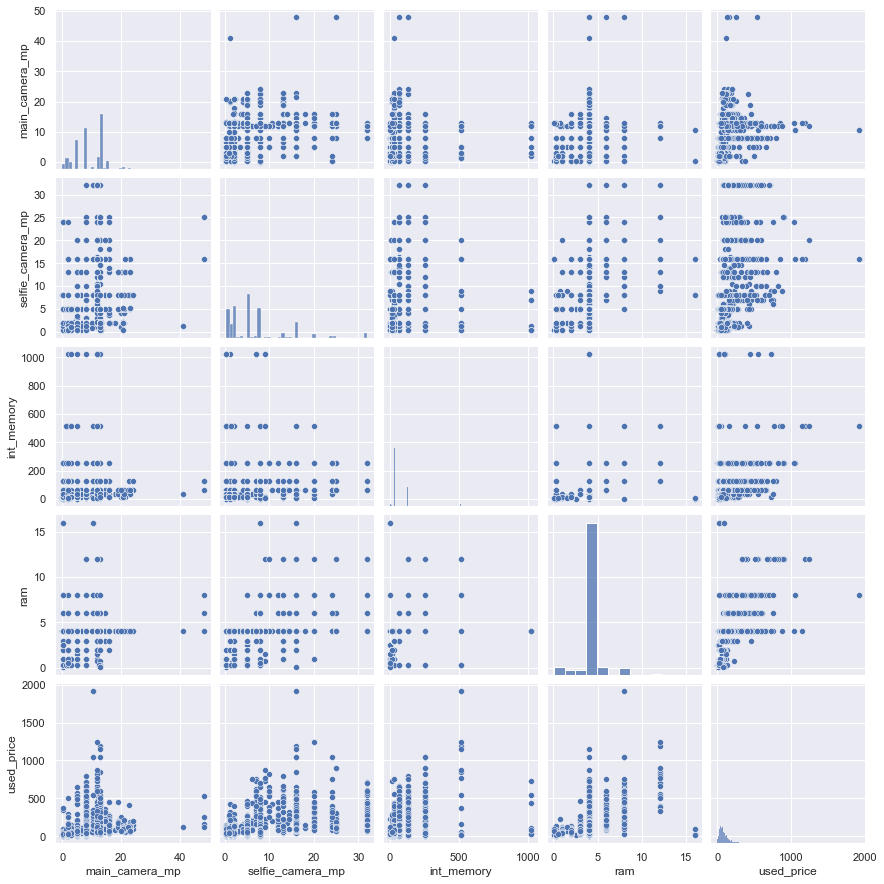

In [214]:
sns.pairplot(data[poss_Multicollinearity]);

* main_camera_mp Vs used_price and selfie_camera_mp Vs used_price may have Multicollinearity.
* int_memory Vs used_price and ram Vs used_price may have Multicollinearity.

In [215]:
five_cols = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory',
       'ram', 'used_price']

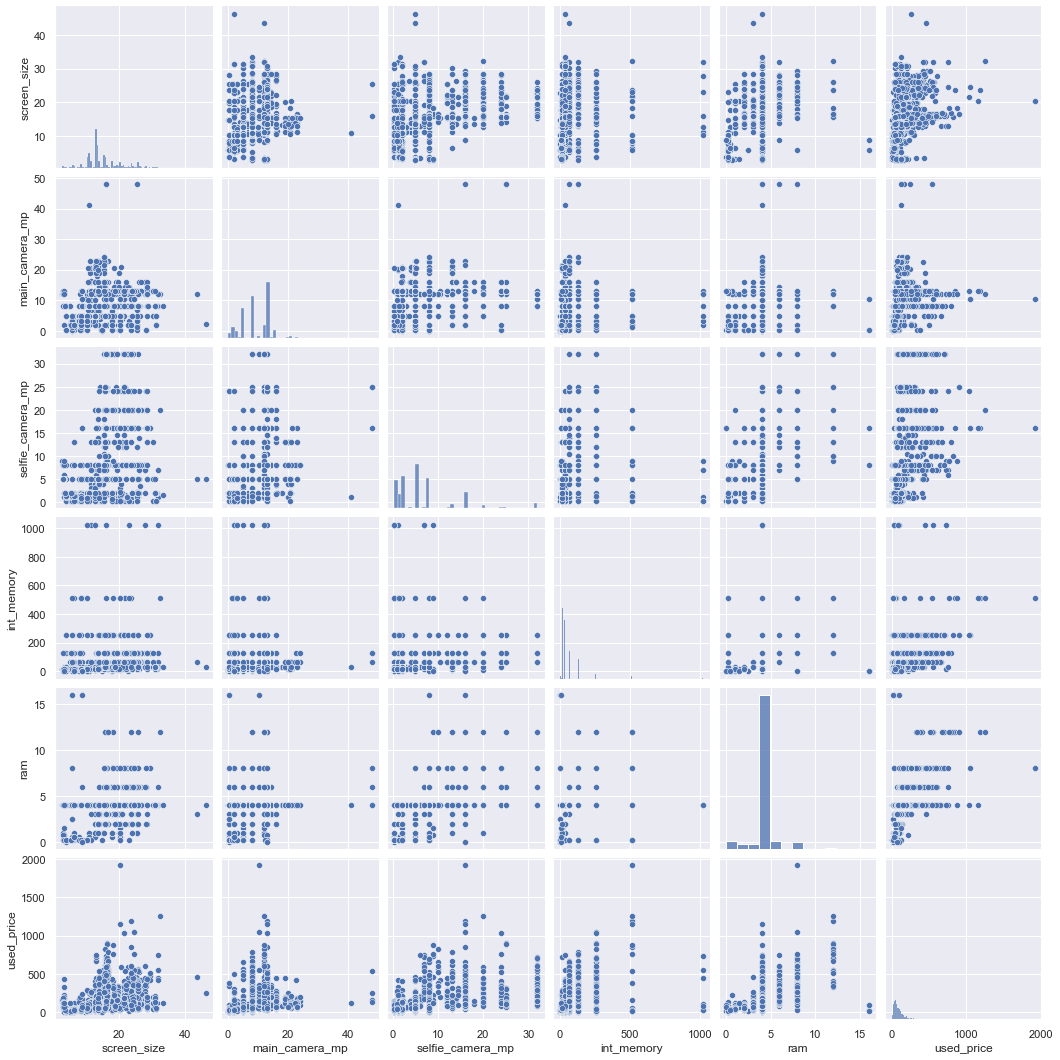

In [216]:
sns.pairplot(data[five_cols]);

In [217]:
next_five_cols = ['battery', 'weight', 'release_year', 'days_used', 'new_price',
       'used_price']

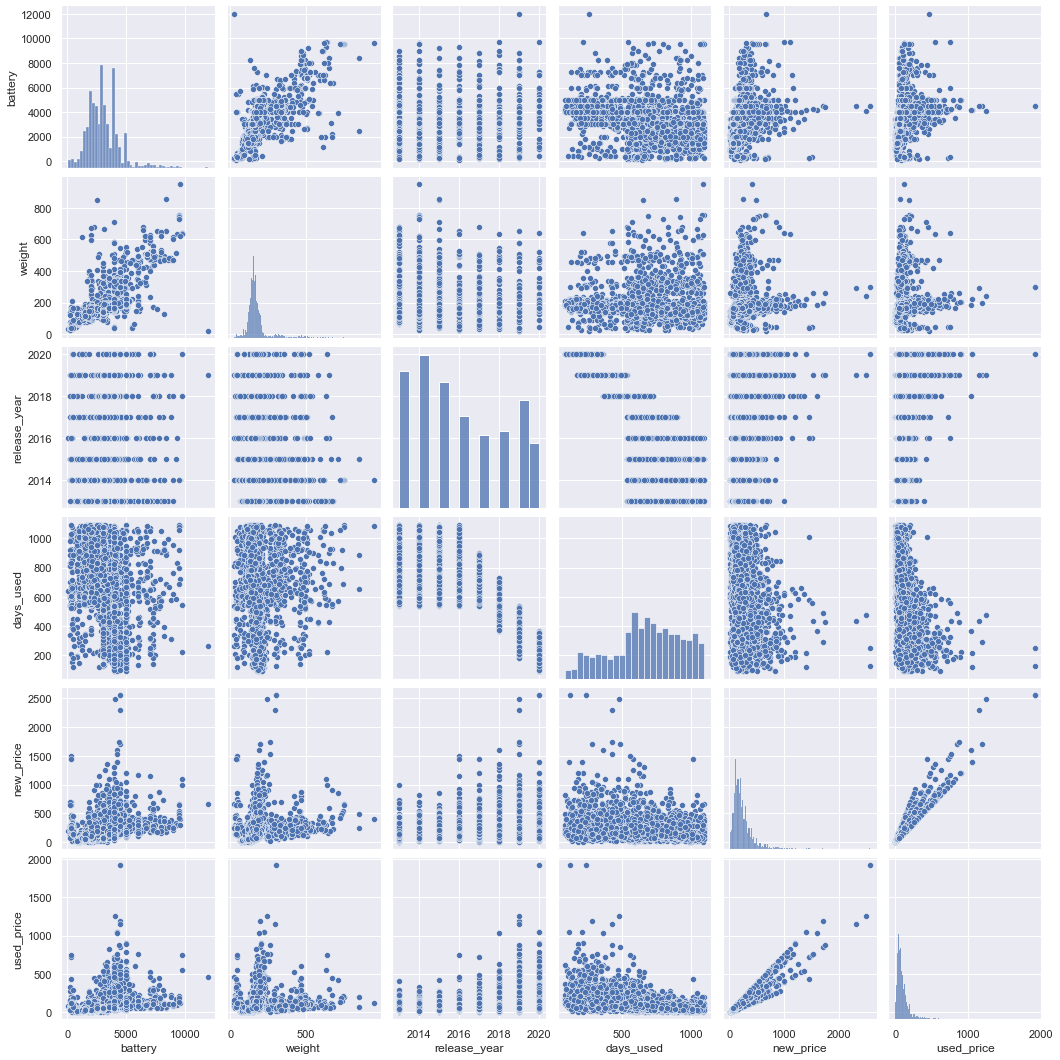

In [218]:
sns.pairplot(data[next_five_cols]);

**Observation**
* Battery and weigth are correlated

#### Question1:  What does the distribution of used phone prices look like?

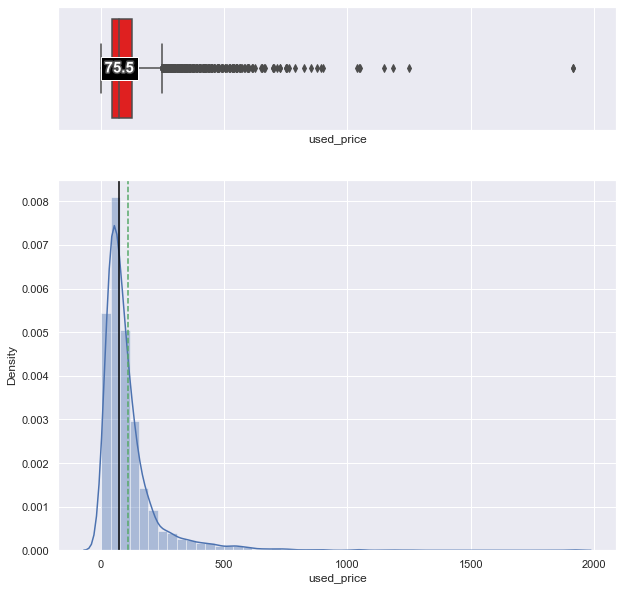

In [219]:
 box_and_histogram(data['used_price'])

**Question 1: Answer**

* Right-skewed distibution, with some outliers on the right.

#### Question2 : What percentage of the used phone market is dominated by Android devices?

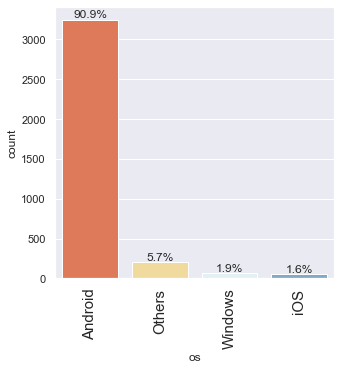

In [220]:
labeled_barplot(data, 'os', True) 

**Question 2: Answer**
* Almost 91% of the used phone market is dominated by Android devices.

#### Question3 : How does the amount of RAM vary with the brand?

#### Ram Vs Brand

In [221]:
# take only ram columns where is not na
data_ram = data[data['ram'].notna()]

In [222]:
data_ram.shape

(3561, 15)

In [223]:
data_ram.groupby('brand_name')['ram'].mean().reset_index().sort_values('ram',ascending = False)

,brand_name,ram
22,OnePlus,6.363636
23,Oppo,4.961240
30,Vivo,4.756410
11,Huawei,4.641326
10,Honor,4.593220
32,Xiaomi,4.567164
8,Google,4.533333
17,Meizu,4.451613
26,Realme,4.195122
27,Samsung,4.159341


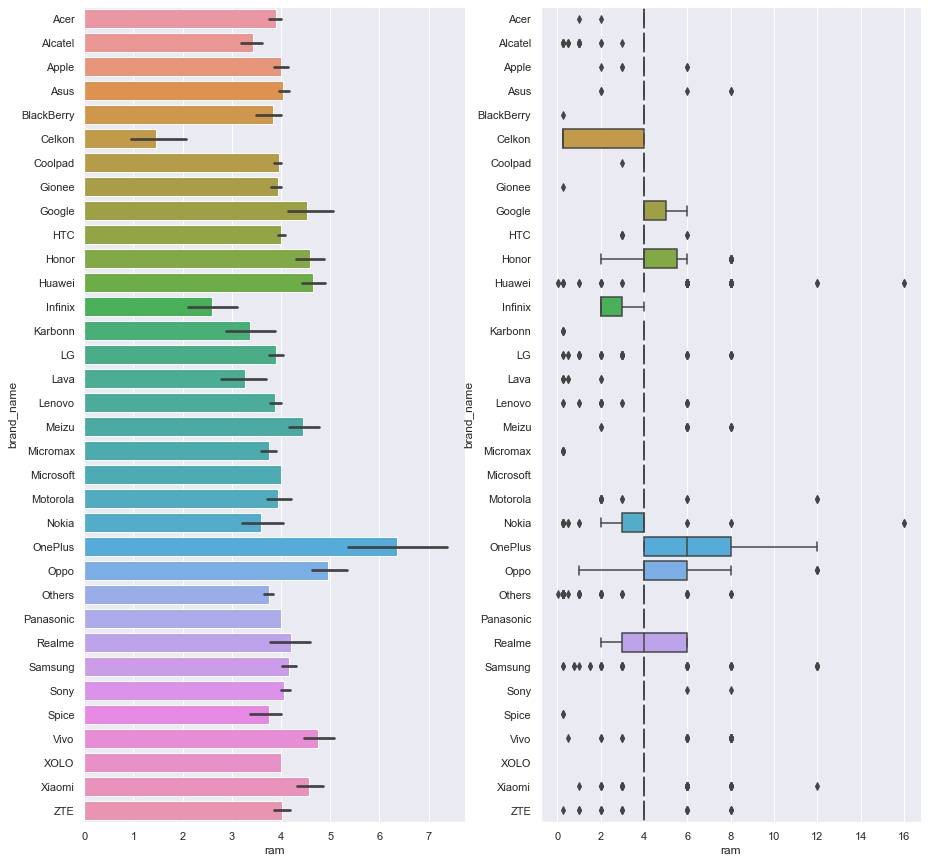

In [224]:
plt.rcParams["figure.figsize"] = (15,15)

plt.subplot(1, 2, 1)

sns.barplot(data=data_ram, x="ram", y="brand_name")
#plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=data_ram, x="ram", y="brand_name")
#plt.xticks(rotation=90)

plt.show()

**Question 3: Answers**

* Oneplus, Oppo and Vivo offer the max RAM

### Question 4: How does the weight vary for phones offering large batteries (more than 4500 mAh)?
#### Phones with battery > 4500 mAh

In [225]:
phones_gt_4500mAh = data[data['battery'] > 4500]

In [226]:
phones_gt_4500mAh.shape

(346, 15)

In [227]:
phones_gt_4500mAh.groupby('brand_name')['battery'].count()\
.reset_index().sort_values('battery',ascending = False)

,brand_name,battery
27,Samsung,52
24,Others,41
11,Huawei,37
32,Xiaomi,31
16,Lenovo,29
3,Asus,22
2,Apple,19
10,Honor,14
20,Motorola,14
30,Vivo,13


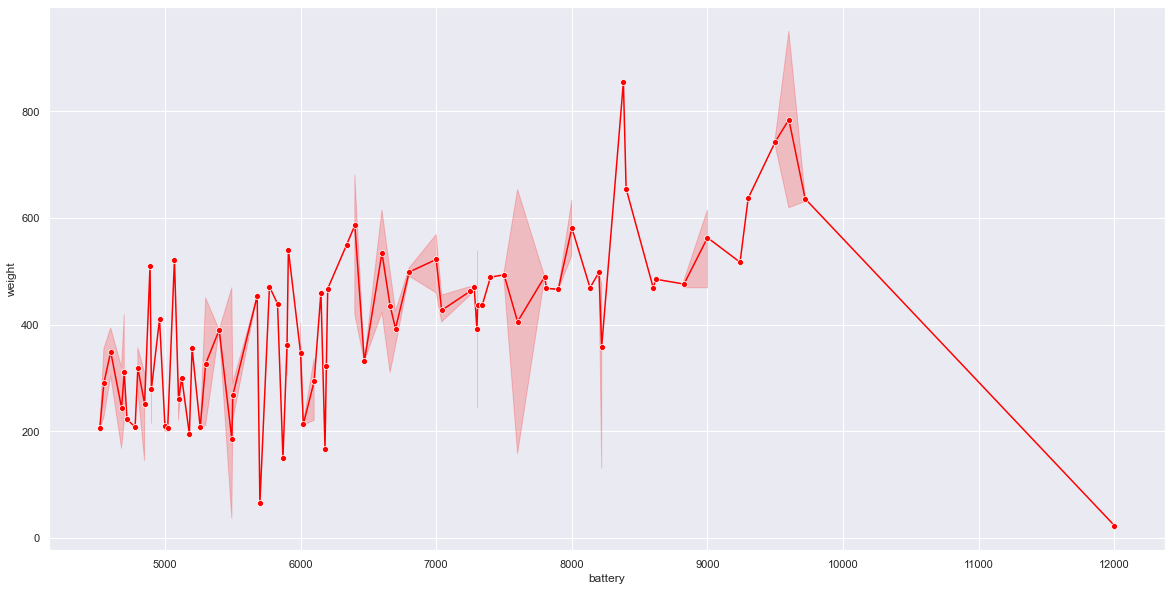

In [228]:
plt.rcParams["figure.figsize"] = (20,10)
sns.lineplot(x=phones_gt_4500mAh['battery'],y=phones_gt_4500mAh['weight'],ci=95, marker='o', color ="red");


**Question 4 : Answers**
* There appears to be an outlier for the battery with 12000 mAh , the weight of this is unsually less
* With the increase in battery power the weight of the battery increases


### Question 5: How many phones are available across different brands with a screen size larger than 6 inches?
#### screen size larger than 6 inches

In [229]:
phones_gt_6inch = data[data['screen_size'] > 6*2.54]

In [230]:
  data[data['screen_size'] > 6*2.54].groupby(['brand_name'])['screen_size']\
    .count().reset_index().sort_values('screen_size',ascending=False)

,brand_name,screen_size
11,Huawei,159
27,Samsung,128
24,Others,116
10,Honor,87
30,Vivo,86
32,Xiaomi,85
16,Lenovo,72
23,Oppo,70
14,LG,68
3,Asus,44


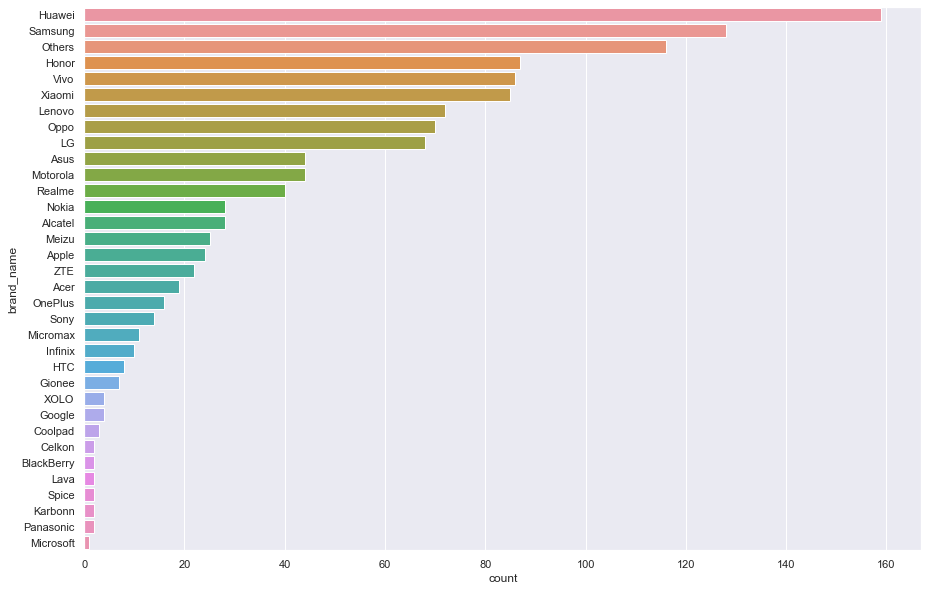

In [231]:
plt.rcParams["figure.figsize"] = (15,10)
sns.countplot(y=phones_gt_6inch['brand_name'], order = phones_gt_6inch['brand_name']\
              .value_counts().index);

**Question 5- Answers**

* Huawei, Samsung offer the most number of phones with screen size greater than 6 inches

### Question 6: What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?
#### Distribution of budget phones offering greater than 8MP selfie cameras across brands

#### Let's have 100 Euros as the cut off for budget phones

##### Create bin for the used price

In [232]:
data_with_bins =data.copy()
# binned_used_price

# add custom labels
data_with_bins['used_price_bin'] = pd.cut(
    data_with_bins['used_price'], [-np.inf, 50, 100, 200, 250, 300, 400, 500, 600, 700, 1000, 1500, 2000, np.inf],\
    labels = ["Under_50", "50-100", "100-200", "200-250", "250-300", "300-400", "400-500", "500-600", "600-700",\
              "700-1000","1000-1500", "1500-2000" ,"Above_2000"])

data_with_bins['used_price_bin'].value_counts(dropna=False)

50-100        1259
Under_50      1028
100-200        892
200-250        110
250-300         84
300-400         79
400-500         52
500-600         33
700-1000        14
600-700         12
1000-1500        6
1500-2000        2
Above_2000       0
Name: used_price_bin, dtype: int64

#### Let's bin the new_price also to get a view of the distribution 

In [233]:
# binned_new_price

# add custom labels
data_with_bins['new_price_bin'] = pd.cut(
    data_with_bins['new_price'], [-np.inf, 50, 100, 200, 250, 300, 400, 500, 600, 700, 1000, 1500, 2000, np.inf],\
    labels = ["Under_50", "50-100", "100-200", "200-250", "250-300", "300-400", "400-500", "500-600", "600-700",\
              "700-1000","1000-1500", "1500-2000" ,"Above_2000"])

data_with_bins['new_price_bin'].value_counts(dropna=False)

100-200       1291
50-100         485
200-250        458
250-300        387
300-400        380
400-500        196
Under_50       128
500-600         81
700-1000        74
600-700         60
1000-1500       22
1500-2000        5
Above_2000       4
Name: new_price_bin, dtype: int64

#### Let's have 100 Euros as the cut off for budget phones

* Let's divide the phones into 4 broad categories
* Budget, Medium, High, Advanced

In [234]:
# used_price_category
# add custom labels
data_with_bins['used_price_category'] = pd.cut(
    data_with_bins['used_price'], [-np.inf, 100, 300, 1000, np.inf],\
    labels = ["Budget_phones", "Medium_level","Hight_End", "Advanced"])

data_with_bins['used_price_category'].value_counts(dropna=False)

Budget_phones    2287
Medium_level     1086
Hight_End         190
Advanced            8
Name: used_price_category, dtype: int64

#### Budget_phones with selfie camers greater than 8 Mp   

In [235]:
budget_phones_8mp = data_with_bins[ (data_with_bins['used_price_category'] == 'Budget_phones')\
                         & ( data_with_bins['selfie_camera_mp'] > 8)]
budget_phones_8mp.shape

(106, 18)

In [236]:
budget_phones_8mp.brand_name.value_counts()

Xiaomi        11
Realme         9
Vivo           8
Sony           7
Samsung        7
Oppo           7
Honor          7
Huawei         7
ZTE            6
Lenovo         6
Others         5
Infinix        4
Meizu          4
HTC            4
Asus           3
Motorola       3
LG             3
Nokia          2
Acer           1
Gionee         1
Panasonic      1
Celkon         0
Apple          0
XOLO           0
Spice          0
BlackBerry     0
Karbonn        0
Coolpad        0
OnePlus        0
Microsoft      0
Micromax       0
Alcatel        0
Lava           0
Google         0
Name: brand_name, dtype: int64

**Question6 : Answers**
* Xiaomi,Realme and Vivo offer many models with selfie camera with more than 8Mp on budget price
* Sony, Samsung, Oppo, Honor and Huawei also good number of models with selfie camera  more than 8Mp on budget

#### log transformation of price

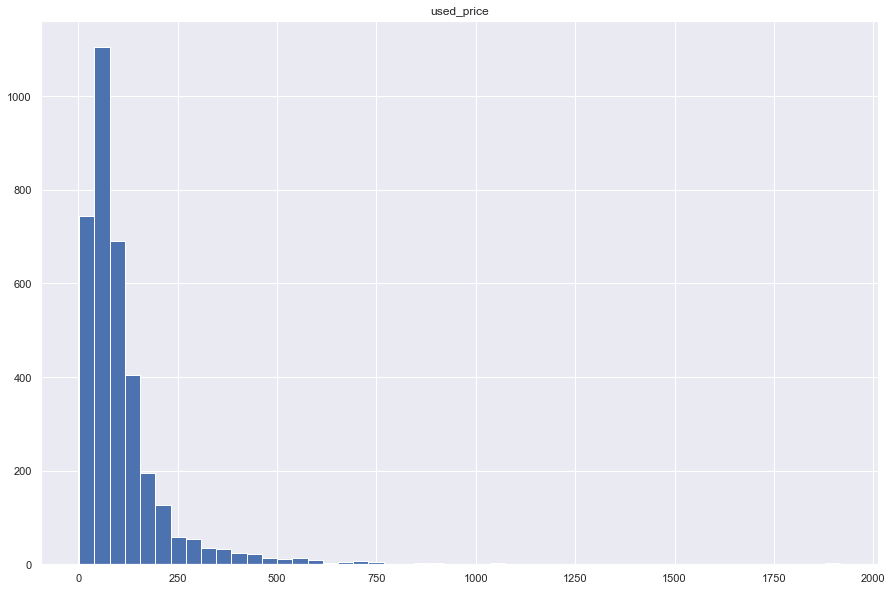

0


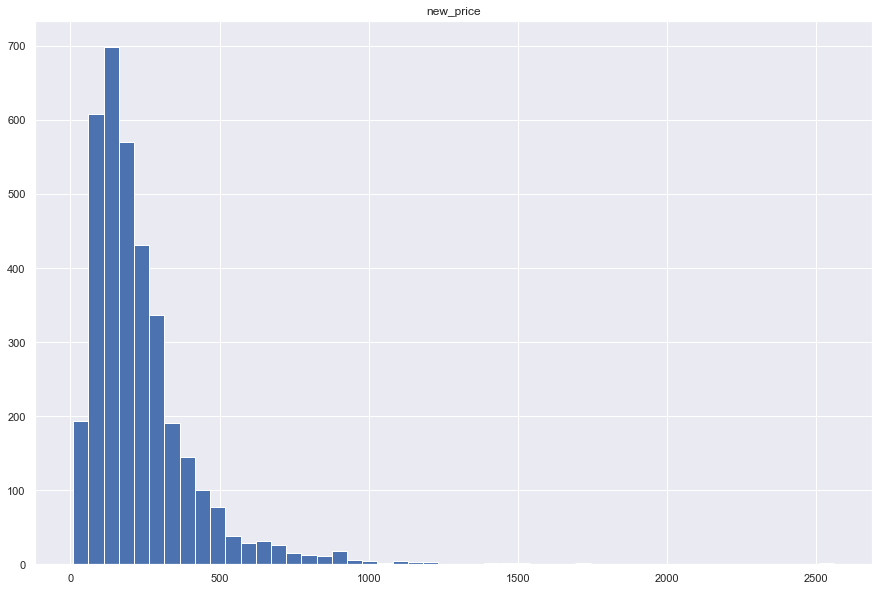

0


In [237]:
cols_to_log = ['used_price', 'new_price']
for colname in cols_to_log:
    plt.hist(data[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(data[colname] <= 0))

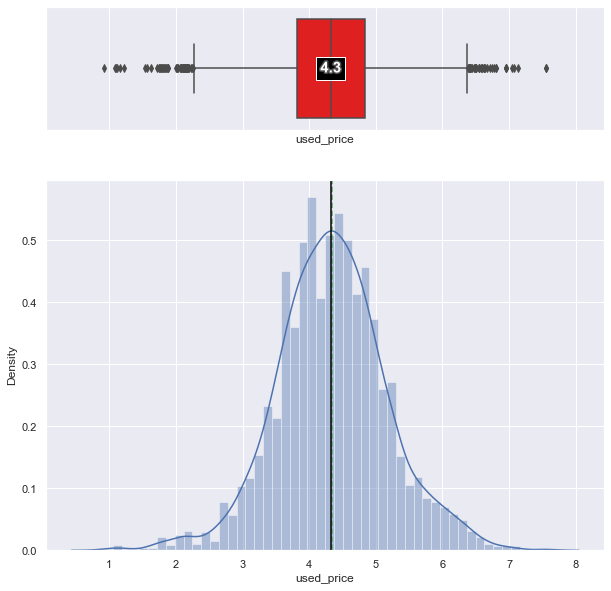

In [238]:
box_and_histogram(np.log(data['used_price']))

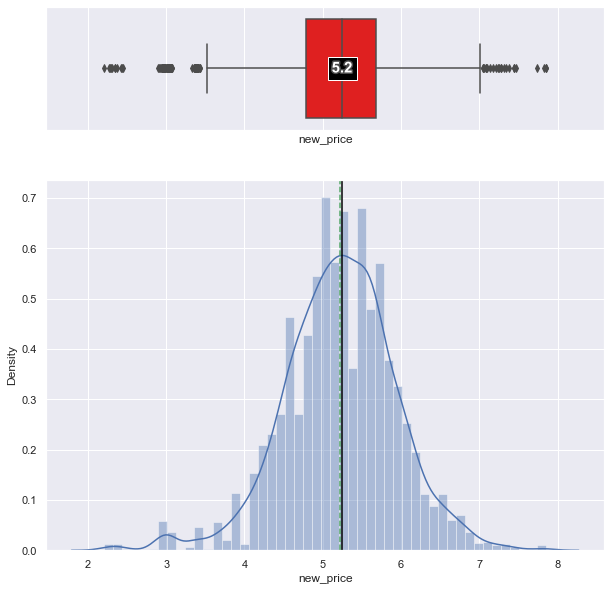

In [239]:
box_and_histogram(np.log(data['new_price']))

**Observation**
* The used price on applying log transformation , converts to almost normal distribution, with some outliers

## Data Preprocessing for liner model building

* We want to predict the used_price.
* Before we proceed to build a model, we'll have to encode categorical features.
* We'll split the data into train and test to be able to evaluate the model that we build on the train data.
* We will build a Linear Regression model using the train data and then check it's performance.

In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3571 non-null   category
 1   os                3571 non-null   category
 2   screen_size       3571 non-null   float64 
 3   4g                3571 non-null   category
 4   5g                3571 non-null   category
 5   main_camera_mp    3391 non-null   float64 
 6   selfie_camera_mp  3569 non-null   float64 
 7   int_memory        3561 non-null   float64 
 8   ram               3561 non-null   float64 
 9   battery           3565 non-null   float64 
 10  weight            3564 non-null   float64 
 11  release_year      3571 non-null   int64   
 12  days_used         3571 non-null   int64   
 13  new_price         3571 non-null   float64 
 14  used_price        3571 non-null   float64 
dtypes: category(4), float64(9), int64(2)
memory usage: 322.7 KB


In [241]:
data.select_dtypes(exclude ='category').columns

Index(['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory',
       'ram', 'battery', 'weight', 'release_year', 'days_used', 'new_price',
       'used_price'],
      dtype='object')

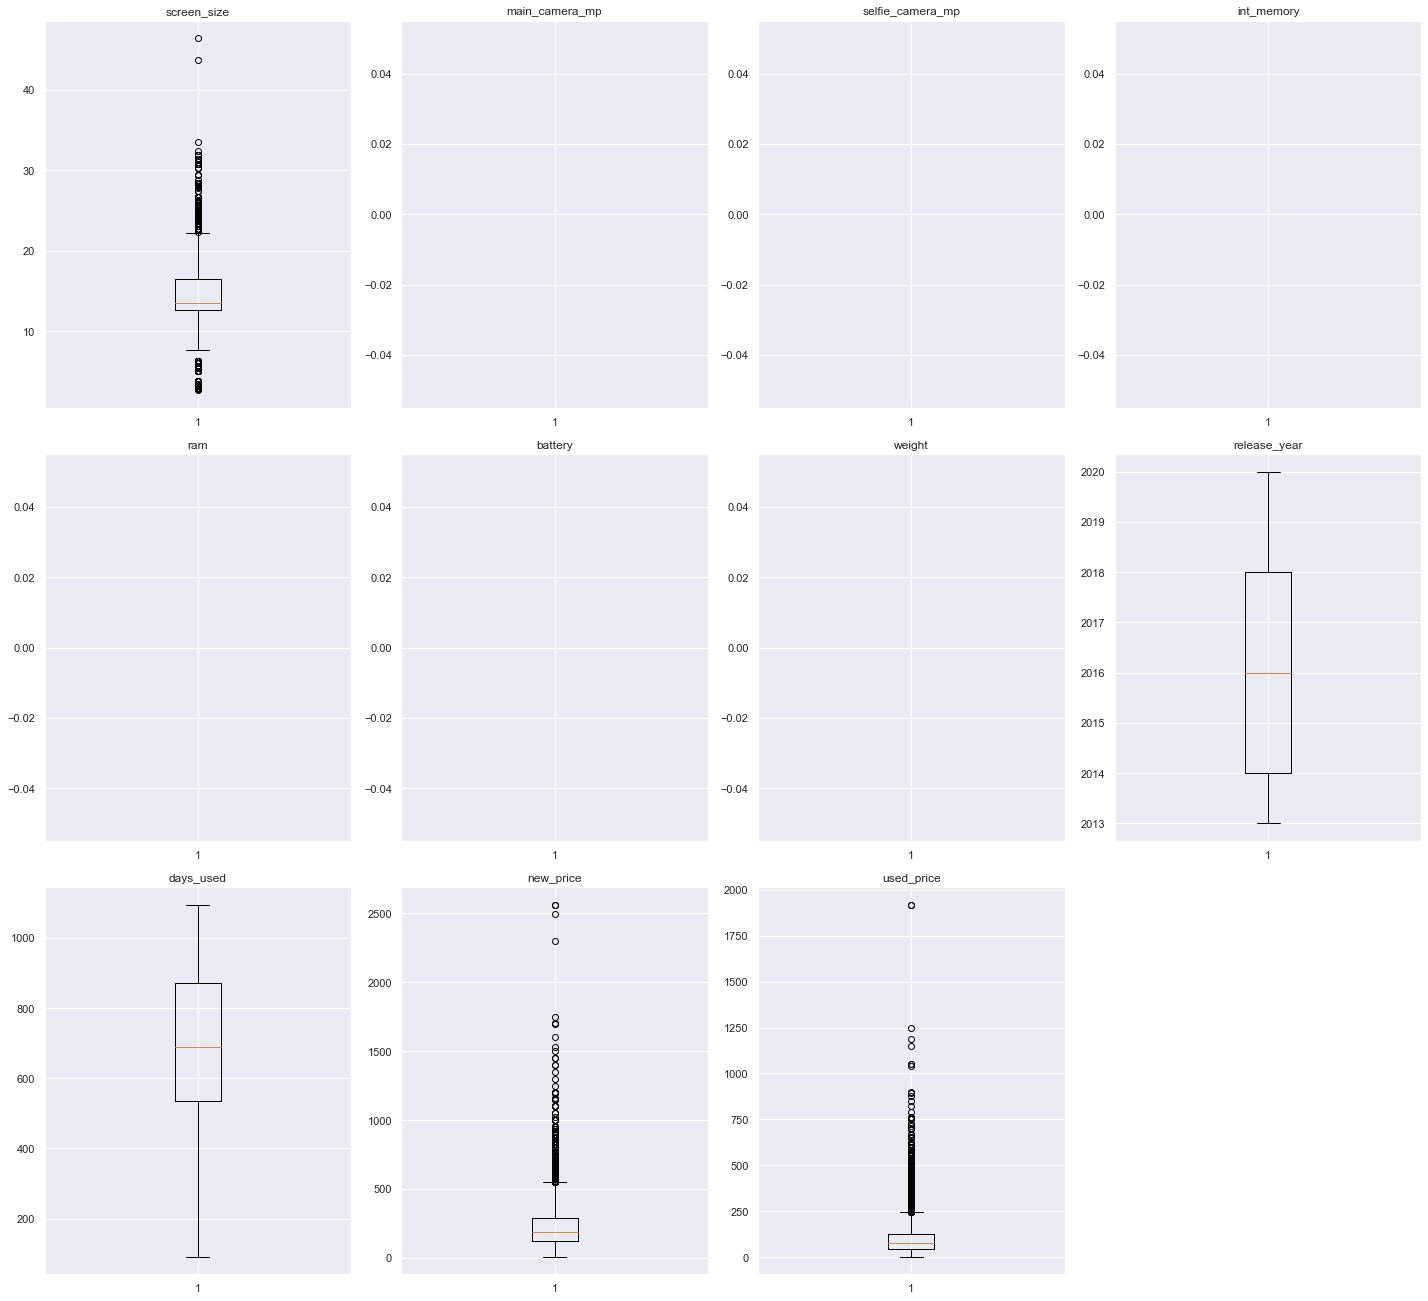

In [242]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Outlier Treatment

- Let's treat outliers in the data by flooring and capping.

In [243]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [244]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
data_out_treated = treat_outliers_all(data, numerical_col)

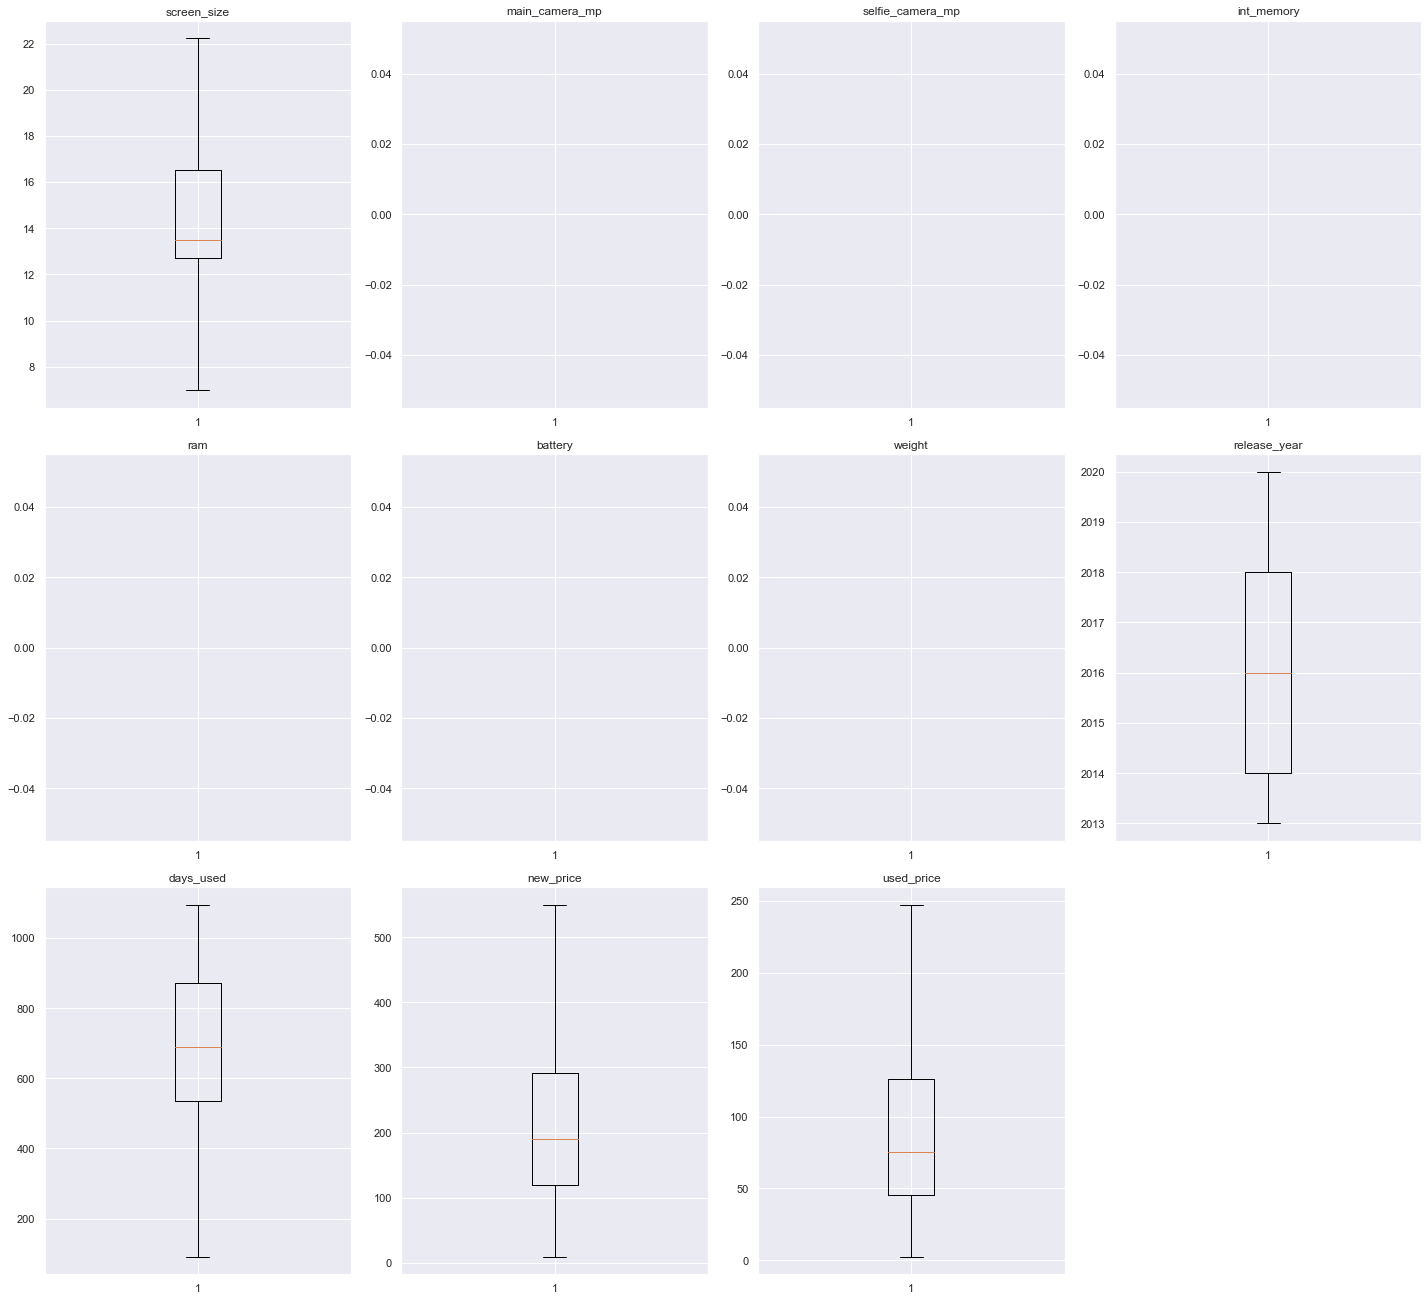

In [245]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data_out_treated[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Drop drop all rows that have any NaN values

In [246]:
data_lin = data_out_treated.dropna()
data_sm_model = data_out_treated.dropna()

In [247]:
data_lin.shape

(3368, 15)

#### Add log tansformed data for used_price and new_price

In [248]:
data_lin['used_price_log'] = np.log(data_lin['used_price'])
data_lin['new_price_log'] = np.log(data_lin['new_price'])

#### Let's add dummy columns for category columns

In [249]:
brand_name_dum = pd.get_dummies(data_lin['brand_name'],drop_first =True)
brand_name_dum_all = pd.get_dummies(data_lin['brand_name'])

In [250]:
os_dum = pd.get_dummies(data_lin['os'],drop_first =True)

In [251]:
Four_G = pd.get_dummies(data_lin['4g'],drop_first =True)
Four_G.rename(columns={"yes": "4G_dum"},inplace = True)

In [252]:
Five_G = pd.get_dummies(data_lin['5g'],drop_first =True)
Five_G.rename(columns={"yes": "5G_dum"},inplace = True)

### Linear model with sklearn learn

In [253]:
data_lin =  pd.concat([data_lin,brand_name_dum, os_dum, Four_G, Five_G ],axis=1)

In [254]:
data_lin.shape

(3368, 55)

In [255]:
col_to_drop= ['brand_name', 'os', '4g', '5g']
log_nor_columns = ['used_price', 'new_price']

In [256]:
data_lin.drop(col_to_drop, inplace=True, axis=1)
data_lin.drop(log_nor_columns, inplace=True, axis=1)

In [257]:
data_lin

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,used_price_log,new_price_log,Alcatel,Apple,Asus,BlackBerry,Celkon,Coolpad,Gionee,Google,HTC,Honor,Huawei,Infinix,Karbonn,LG,Lava,Lenovo,Meizu,Micromax,Microsoft,Motorola,Nokia,OnePlus,Oppo,Others,Panasonic,Realme,Samsung,Sony,Spice,Vivo,XOLO,Xiaomi,ZTE,Others,Windows,iOS,4G_dum,5G_dum
0,22.225,13.0,5.0,64.0,4.0,3020.0,146.0,2020,127,4.465448,4.715100,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,22.225,13.0,16.0,128.0,4.0,4300.0,213.0,2020,325,5.084443,5.519018,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,22.225,13.0,8.0,128.0,4.0,4200.0,213.0,2020,162,5.510167,5.884631,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,22.225,13.0,8.0,64.0,4.0,6850.0,250.0,2020,345,5.194234,5.630961,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,15.720,13.0,8.0,64.0,4.0,5000.0,185.0,2020,293,4.642466,4.947837,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3564,15.400,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,5.510167,6.287936,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3567,15.240,13.0,8.0,128.0,4.0,4000.0,200.0,2018,541,5.510167,6.251546,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3568,18.730,13.0,5.0,32.0,4.0,4000.0,165.0,2020,201,4.245777,4.528829,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3569,18.730,13.0,5.0,32.0,4.0,4000.0,160.0,2020,149,4.331654,4.624139,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [258]:
data_lin.shape

(3368, 49)

In [259]:
# defining X and y variables
X = data_lin.drop(["used_price_log"], axis=1)
y = data_lin["used_price_log"]


In [260]:
X.shape

(3368, 48)

In [261]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

In [262]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2357
Number of rows in test data = 1011


In [263]:
# fitting the model on the train data (70% of the whole data)

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

In [264]:
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
screen_size,1.454855e-03
main_camera_mp,2.211955e-03
selfie_camera_mp,2.227340e-03
int_memory,-3.516711e-04
ram,-4.071604e-13
battery,1.860422e-06
weight,8.342298e-06
release_year,-1.079343e-03
days_used,-1.061436e-03
new_price_log,9.670384e-01


**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

In [265]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [266]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.094446,0.07664,0.983244,0.982895,1.836847


In [267]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.10114,0.080199,0.983241,0.982405,1.97683


**Observations**

- The training $R^2$ is 98.9%, indicating that the model explains 98.9% of the variation in the train data. So, the model is not underfitting.

- MAE and RMSE on the train and test sets are comparable, which shows that the model is not overfitting.

- MAE indicates that our current model is able to predict life expectancy within a mean error of .07 years on the test data.

- MAPE on the test set suggests we can predict within 1.8% of the life expectancy.

## Linear Regression using statsmodels

- Let's build a linear regression model using statsmodels.

### Let's  use non log transformed data

In [268]:
data_with_dummies = pd.concat([data_sm_model,brand_name_dum, os_dum, Four_G, Five_G ],axis=1)
data_with_dummies

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,Alcatel,Apple,Asus,BlackBerry,Celkon,Coolpad,Gionee,Google,HTC,Honor,Huawei,Infinix,Karbonn,LG,Lava,Lenovo,Meizu,Micromax,Microsoft,Motorola,Nokia,OnePlus,Oppo,Others,Panasonic,Realme,Samsung,Sony,Spice,Vivo,XOLO,Xiaomi,ZTE,Others,Windows,iOS,4G_dum,5G_dum
0,Honor,Android,22.225,yes,no,13.0,5.0,64.0,4.0,3020.0,146.0,2020,127,111.6200,86.9600,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Honor,Android,22.225,yes,yes,13.0,16.0,128.0,4.0,4300.0,213.0,2020,325,249.3900,161.4900,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,Honor,Android,22.225,yes,yes,13.0,8.0,128.0,4.0,4200.0,213.0,2020,162,359.4700,247.1925,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,Honor,Android,22.225,yes,yes,13.0,8.0,64.0,4.0,6850.0,250.0,2020,345,278.9300,180.2300,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,Honor,Android,15.720,yes,no,13.0,8.0,64.0,4.0,5000.0,185.0,2020,293,140.8700,103.8000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3564,Apple,iOS,15.400,yes,no,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,538.0415,247.1925,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3567,Asus,Android,15.240,yes,no,13.0,8.0,128.0,4.0,4000.0,200.0,2018,541,518.8145,247.1925,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3568,Alcatel,Android,18.730,yes,no,13.0,5.0,32.0,4.0,4000.0,165.0,2020,201,92.6500,69.8100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3569,Alcatel,Android,18.730,yes,no,13.0,5.0,32.0,4.0,4000.0,160.0,2020,149,101.9150,76.0700,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [269]:
col_to_drop= ['brand_name', 'os', '4g', '5g']


In [270]:
data_for_sm_model = data_with_dummies.drop(col_to_drop, axis=1)
data_for_sm_model.shape

(3368, 49)

In [271]:
# defining X and y variables
X_sm = data_for_sm_model.drop(["used_price"], axis=1)
y_sm = data_for_sm_model["used_price"]


In [272]:
# splitting the data in 70:30 ratio for train to test data

x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(
    X_sm, y_sm, test_size=0.3, random_state=1
)

In [273]:
x_train_sm.shape

(2357, 48)

In [274]:
y_train_sm.shape

(2357,)

In [275]:
## Linear Regression using statsmodels

x_train_sm_1 = sm.add_constant(x_train_sm)
# adding constant to the test data
x_test_sm_1 = sm.add_constant(x_test_sm)

olsmod0 = sm.OLS(y_train_sm, x_train_sm_1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1095.
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        08:05:59   Log-Likelihood:                -9393.5
No. Observations:                2357   AIC:                         1.888e+04
Df Residuals:                    2310   BIC:                         1.915e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
screen_size          0.0963      0.122  

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

In [276]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [277]:
vif_values_m0 = checking_vif(x_train_sm)
vif_values_m0

,feature,VIF
0,screen_size,3.398831e+00
1,main_camera_mp,2.301140e+00
2,selfie_camera_mp,3.632246e+00
3,int_memory,2.049460e+00
4,ram,3.879721e+06
5,battery,3.468284e+00
6,weight,3.028588e+00
7,release_year,4.570652e+00
8,days_used,2.296713e+00
9,new_price,2.555047e+00


* Infinix has a VIF of NaN
* Lets drop the variable in get_dummies for brand_name one by one

#### Let us check VIF values by dropping each one of the  column added by pd.get_dummies for brand_name

In [278]:
cols = brand_name_dum_all.columns.to_list()

In [279]:
cols = brand_name_dum_all.columns.to_list()
for col_to_be_dropped in cols:
    #print('Dealing with col {}'.format(col_to_be_dropped))
    
    
    
    x_train2 = x_train_sm_1.loc[:, ~x_train_sm_1.columns.str.startswith(col_to_be_dropped)]
    x_test2 = x_test_sm_1.loc[:, ~x_test_sm_1.columns.str.startswith(col_to_be_dropped)]

    # Check VIF now
    vif_values = checking_vif(x_train2)
    #print("VIF after dropping ", col_to_be_dropped)
    vif_true =vif_values.isna().any()['VIF']
    print('is vif_values is nan when col {} is removed -> {}'.format(col_to_be_dropped, 
                                                         vif_values.isna().any()['VIF']))
    if not vif_true:
        print(vif_values)

is vif_values is nan when col Acer is removed -> True
is vif_values is nan when col Alcatel is removed -> True
is vif_values is nan when col Apple is removed -> True
is vif_values is nan when col Asus is removed -> True
is vif_values is nan when col BlackBerry is removed -> True
is vif_values is nan when col Celkon is removed -> True
is vif_values is nan when col Coolpad is removed -> True
is vif_values is nan when col Gionee is removed -> True
is vif_values is nan when col Google is removed -> True
is vif_values is nan when col HTC is removed -> True
is vif_values is nan when col Honor is removed -> True
is vif_values is nan when col Huawei is removed -> True
is vif_values is nan when col Infinix is removed -> False
             feature           VIF
0        screen_size  3.398831e+00
1     main_camera_mp  2.301140e+00
2   selfie_camera_mp  3.632246e+00
3         int_memory  2.049460e+00
4                ram  3.879721e+06
5            battery  3.468284e+00
6             weight  3.0285

##### After dropping Infinix  the VIF is not NaN

In [280]:
col_to_drop = "Infinix"
x_train3 = x_train_sm_1.loc[:, ~x_train_sm_1.columns.str.startswith(col_to_drop)]
x_test3 = x_test_sm_1.loc[:, ~x_test_sm_1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif_values3 = checking_vif(x_train3)
vif_values3

,feature,VIF
0,screen_size,3.398831e+00
1,main_camera_mp,2.301140e+00
2,selfie_camera_mp,3.632246e+00
3,int_memory,2.049460e+00
4,ram,3.879721e+06
5,battery,3.468284e+00
6,weight,3.028588e+00
7,release_year,4.570652e+00
8,days_used,2.296713e+00
9,new_price,2.555047e+00


In [281]:
vif_values_gt_10 = vif_values3[vif_values3['VIF'] > 10]
vif_values_gt_10

,feature,VIF
4,ram,3.879721e+06
11,Apple,1.376628e+01
44,iOS,1.260284e+01


### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

In [282]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [283]:
col_list = vif_values_gt_10['feature'].to_list()
print(col_list)
res = treating_multicollinearity(x_train_sm_1, y_train_sm, col_list)
res

['ram', 'Apple', 'iOS']


,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,ram,0.985805,13.151082
1,iOS,0.955299,13.148411
2,Apple,0.955270,13.152567


#### Let's drop 'ram' and check 

In [284]:
# function to drop a column and compute the VIF
def check_vif_by_drop_one_column(col, old_x_train, old_xtest):
    col_to_drop = col
    
    new_x_train = old_x_train.loc[:, ~old_x_train.columns.str.startswith(col_to_drop)]
    new_x_test = old_xtest.loc[:, ~old_xtest.columns.str.startswith(col_to_drop)]



    # Check VIF now
    vif_values_new = checking_vif(new_x_train)
    vif_values_gt_10 = vif_values_new[vif_values_new['VIF'] > 10]
    vif_values_gt_10
    return (new_x_train, new_x_test, vif_values_gt_10)

In [285]:
col_to_drop = 'ram'
x_train4, x_test4, result_vif_values_gt_10 = \
                            check_vif_by_drop_one_column(col_to_drop, x_train3, x_test3)
print("VIF after dropping ", col_to_drop)
print('The VIF col list {}'.format(result_vif_values_gt_10))
print('-------------------------')
col_list = result_vif_values_gt_10['feature'].to_list()
print('The VIF col list {}'.format(col_list))

res = treating_multicollinearity(x_train_sm_1, y_train_sm, col_list)
print(res)

VIF after dropping  ram
The VIF col list            feature         VIF
0      screen_size   44.806745
1   main_camera_mp   11.929009
4          battery   22.871921
5           weight   50.877185
6     release_year  123.624340
7        days_used   16.817974
10           Apple   13.931990
31          Others   10.568556
43             iOS   12.779890
-------------------------
The VIF col list ['screen_size', 'main_camera_mp', 'battery', 'weight', 'release_year', 'days_used', 'Apple', 'Others', 'iOS']
              col  Adj. R-squared after_dropping col  RMSE after dropping col
0          weight                           0.955302                13.147887
1         battery                           0.955299                13.148301
2             iOS                           0.955299                13.148411
3     screen_size                           0.955290                13.149660
4    release_year                           0.955285                13.150416
5           Apple           

In [286]:
col_to_drop = 'weight'
x_train5, x_test5, result_vif_values_gt_10 = \
                            check_vif_by_drop_one_column(col_to_drop, x_train4, x_test4)
print("VIF after dropping ", col_to_drop)
print('The VIF col list {}'.format(result_vif_values_gt_10))

col_list = result_vif_values_gt_10['feature'].to_list()
#print('The VIF col list {}'.format(col_list))

res = treating_multicollinearity(x_train_sm_1, y_train_sm, col_list)
print(res)

VIF after dropping  weight
The VIF col list            feature         VIF
0      screen_size   38.362538
1   main_camera_mp   11.678495
4          battery   17.892024
5     release_year  116.063185
6        days_used   16.696942
9            Apple   13.931710
30          Others   10.567555
42             iOS   12.770124
              col  Adj. R-squared after_dropping col  RMSE after dropping col
0         battery                           0.955299                13.148301
1             iOS                           0.955299                13.148411
2     screen_size                           0.955290                13.149660
3    release_year                           0.955285                13.150416
4           Apple                           0.955270                13.152567
5          Others                           0.955185                13.165182
6  main_camera_mp                           0.955147                13.170623
7       days_used                           0.908535 

In [287]:
col_to_drop = 'battery'
x_train6, x_test6, result_vif_values_gt_10 = \
                            check_vif_by_drop_one_column(col_to_drop, x_train5, x_test5)
print("VIF after dropping ", col_to_drop)
print('The VIF col list {}'.format(result_vif_values_gt_10))

col_list = result_vif_values_gt_10['feature'].to_list()
print('-------------------------')

res = treating_multicollinearity(x_train_sm_1, y_train_sm, col_list)
print(res)

VIF after dropping  battery
The VIF col list            feature         VIF
0      screen_size   23.418777
1   main_camera_mp   11.676887
4     release_year  116.003572
5        days_used   16.693204
8            Apple   13.880664
29          Others   10.566475
41             iOS   12.690012
-------------------------
              col  Adj. R-squared after_dropping col  RMSE after dropping col
0             iOS                           0.955299                13.148411
1     screen_size                           0.955290                13.149660
2    release_year                           0.955285                13.150416
3           Apple                           0.955270                13.152567
4          Others                           0.955185                13.165182
5  main_camera_mp                           0.955147                13.170623
6       days_used                           0.908535                18.807851


In [288]:
col_to_drop = 'iOS'
x_train7, x_test7, result_vif_values_gt_10 = \
                            check_vif_by_drop_one_column(col_to_drop, x_train6, x_test6)
print("VIF after dropping ", col_to_drop)
print('The VIF col list {}'.format(result_vif_values_gt_10))

col_list = result_vif_values_gt_10['feature'].to_list()
print('-------------------------')

res = treating_multicollinearity(x_train_sm_1, y_train_sm, col_list)
print(res)

VIF after dropping  iOS
The VIF col list            feature         VIF
0      screen_size   23.126013
1   main_camera_mp   11.638320
4     release_year  115.744994
5        days_used   16.663082
29          Others   10.566469
-------------------------
              col  Adj. R-squared after_dropping col  RMSE after dropping col
0     screen_size                           0.955290                13.149660
1    release_year                           0.955285                13.150416
2          Others                           0.955185                13.165182
3  main_camera_mp                           0.955147                13.170623
4       days_used                           0.908535                18.807851


In [289]:
col_to_drop = 'screen_size'
x_train8, x_test8, result_vif_values_gt_10 = \
                            check_vif_by_drop_one_column(col_to_drop, x_train7, x_test7)
print("VIF after dropping ", col_to_drop)
print('The VIF col list {}'.format(result_vif_values_gt_10))

col_list = result_vif_values_gt_10['feature'].to_list()
print('-------------------------')

res = treating_multicollinearity(x_train_sm_1, y_train_sm, col_list)
print(res)

VIF after dropping  screen_size
The VIF col list            feature        VIF
0   main_camera_mp  11.306807
3     release_year  84.014022
4        days_used  15.834994
28          Others  10.526866
-------------------------
              col  Adj. R-squared after_dropping col  RMSE after dropping col
0    release_year                           0.955285                13.150416
1          Others                           0.955185                13.165182
2  main_camera_mp                           0.955147                13.170623
3       days_used                           0.908535                18.807851


In [290]:
col_to_drop = 'release_year'
x_train9, x_test9, result_vif_values_gt_10 = \
                            check_vif_by_drop_one_column(col_to_drop, x_train8, x_test8)
print("VIF after dropping ", col_to_drop)
print('The VIF col list {}'.format(result_vif_values_gt_10))

col_list = result_vif_values_gt_10['feature'].to_list()
print('-------------------------')

res = treating_multicollinearity(x_train_sm_1, y_train_sm, col_list)
print(res)

VIF after dropping  release_year
The VIF col list           feature        VIF
0  main_camera_mp  11.221904
3       days_used  12.520625
-------------------------
              col  Adj. R-squared after_dropping col  RMSE after dropping col
0  main_camera_mp                           0.955147                13.170623
1       days_used                           0.908535                18.807851


In [291]:
col_to_drop = 'main_camera_mp'
x_train10, x_test10, result_vif_values_gt_10 = \
                            check_vif_by_drop_one_column(col_to_drop, x_train9, x_test9)
print("VIF after dropping ", col_to_drop)
print('The VIF col list {}'.format(result_vif_values_gt_10))

col_list = result_vif_values_gt_10['feature'].to_list()
print('-------------------------')

res = treating_multicollinearity(x_train_sm_1, y_train_sm, col_list)
print(res)

VIF after dropping  main_camera_mp
The VIF col list      feature        VIF
2  days_used  12.232359
-------------------------
         col  Adj. R-squared after_dropping col  RMSE after dropping col
0  days_used                           0.908535                18.807851


In [292]:
col_to_drop = 'days_used'
x_train11, x_test11, result_vif_values_gt_10 = \
                            check_vif_by_drop_one_column(col_to_drop, x_train10, x_test10)
print("VIF after dropping ", col_to_drop)
print('The VIF col list {}'.format(result_vif_values_gt_10))

col_list = result_vif_values_gt_10['feature'].to_list()
print('-------------------------')

res = treating_multicollinearity(x_train_sm_1, y_train_sm, col_list)
print(res)

VIF after dropping  days_used
The VIF col list Empty DataFrame
Columns: [feature, VIF]
Index: []
-------------------------
Empty DataFrame
Columns: [col, Adj. R-squared after_dropping col, RMSE after dropping col]
Index: []


In [293]:
result_vif_values_gt_10

,feature,VIF


#### The VIF scores are less then 10 now 

**The above predictors have no multicollinearity and the assumption is satisfied.**

Let's check the model performance.

In [294]:
olsmod1 = sm.OLS(y_train_sm, x_train11).fit()
print(olsmod1.summary())

                                 OLS Regression Results                                
Dep. Variable:             used_price   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              1663.
Date:                Sat, 21 Aug 2021   Prob (F-statistic):                        0.00
Time:                        08:06:12   Log-Likelihood:                         -10464.
No. Observations:                2357   AIC:                                  2.101e+04
Df Residuals:                    2318   BIC:                                  2.123e+04
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

##### BlackBerry , Honor, Huawei, LG, Microsoft, Motorola, Nokia, Realme, Vivo, and 4G_dum  all have  p-value > 0.05
So, they are not significant and we'll drop them.

In [295]:
# initial list of columns
cols = x_train11.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train11[cols]

    # fitting the model
    model = sm.OLS(y_train_sm, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['selfie_camera_mp', 'int_memory', 'new_price', 'Alcatel', 'Apple', 'Asus', 'Celkon', 'Coolpad', 'Gionee', 'Google', 'HTC', 'Honor', 'Lava', 'Lenovo', 'Meizu', 'Micromax', 'OnePlus', 'Oppo', 'Others', 'Panasonic', 'Samsung', 'Sony', 'Xiaomi', 'ZTE', 'Others', 'Windows', '5G_dum']


In [296]:
x_train_final = x_train11[selected_features]
x_test_final = x_test11[selected_features]

In [297]:
olsmod2 = sm.OLS(y_train_sm, x_train_final).fit()
print(olsmod2.summary())

                                 OLS Regression Results                                
Dep. Variable:             used_price   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              2392.
Date:                Sat, 21 Aug 2021   Prob (F-statistic):                        0.00
Time:                        08:06:13   Log-Likelihood:                         -10475.
No. Observations:                2357   AIC:                                  2.100e+04
Df Residuals:                    2330   BIC:                                  2.116e+04
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

**Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train_f* as the final ones and *olsmod2* as final model.**

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

In [298]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train_sm  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
191,40.9900,37.774821,3.215179
3282,21.0700,19.917828,1.152172
3359,103.8500,72.953353,30.896647
580,15.4300,37.818940,-22.388940
148,247.1925,231.005098,16.187402


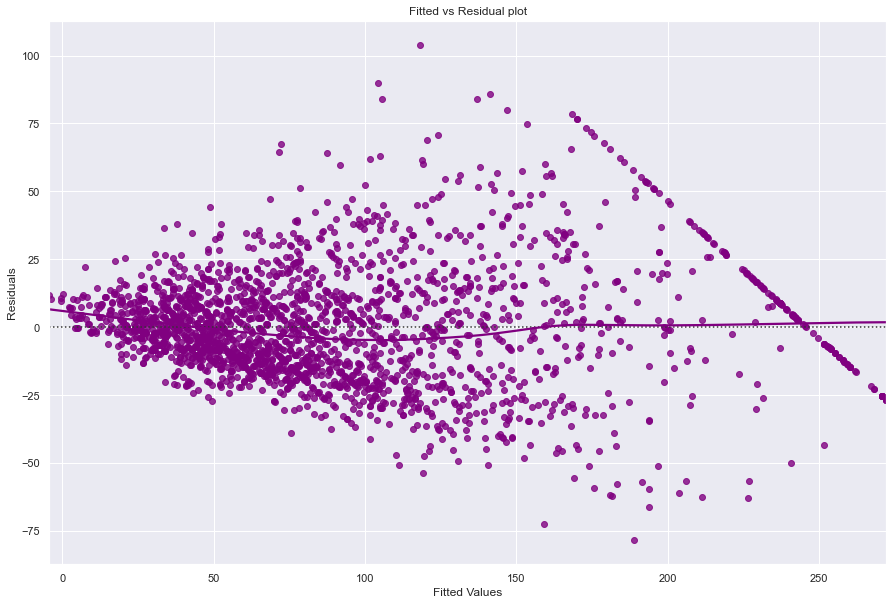

In [299]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**



### TEST FOR NORMALITY

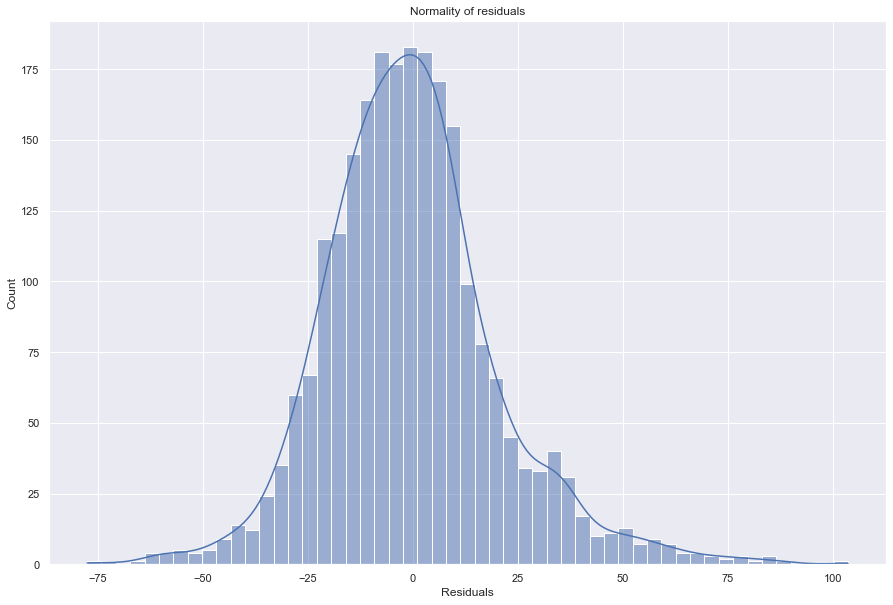

In [300]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

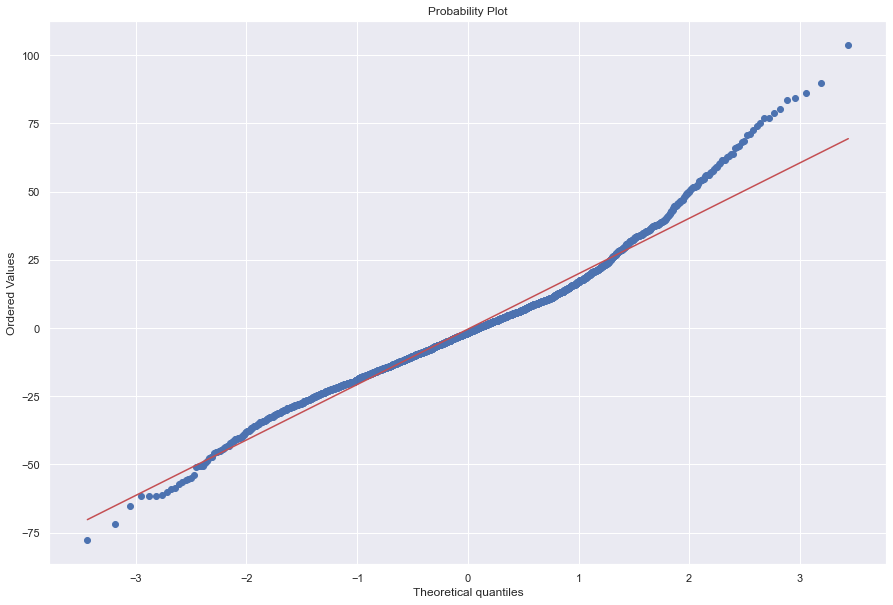

In [301]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [302]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9716421365737915, pvalue=3.3734527662670446e-21)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY


In [303]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train_final)
lzip(name, test)

[('F statistic', 1.0654310933381863), ('p-value', 0.14112269394353816)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

**Now that we have checked all the assumptions of linear regression and they are satisfied, we can move towards the prediction part.**

In [304]:
# predictions on the test set
pred = olsmod2.predict(x_test_final)

df_pred_test = pd.DataFrame({"Actual": y_test_sm, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1467,93.1700,118.618383
1041,74.7500,90.585870
3545,247.1925,190.634999
1202,109.8000,80.149991
3513,83.1600,59.411924
2447,247.1925,236.210764
1247,120.8400,111.376061
3471,152.8100,130.988516
1482,60.0200,84.506598
2651,150.3500,110.070237


- The model has returned good prediction results, and the actual and predicted values are comparable for most cases.

- We can also visualize comparison result as a bar graph.

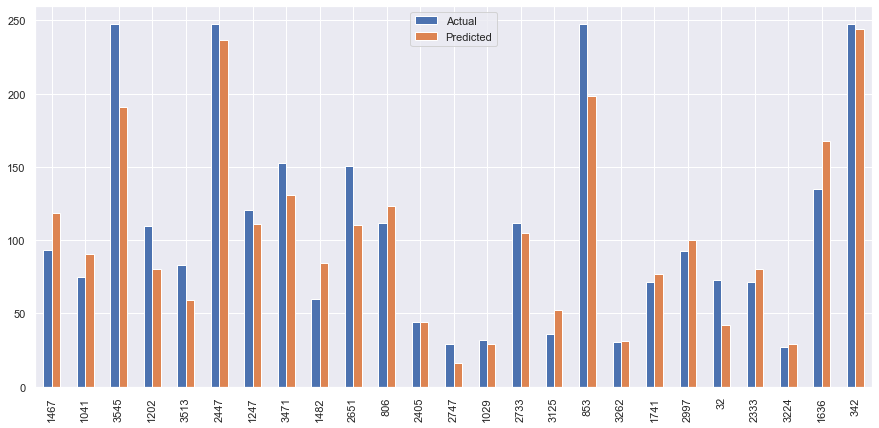

In [305]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

In [306]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train_final, y_train_sm)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,20.595608,15.388272,0.890274,0.888907,21.080383


In [307]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test_final, y_test_sm)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,21.630428,16.175851,0.893233,0.890077,22.921057


* The model is able to explain ~89% of the variation in the data, which is very good.

* The train and test RMSE and MAE differences are low and comparable. So, our model is not suffering from overfitting.

* The MAPE on the test set suggests we can predict within 23% of the used_price. 

* Hence, we can conclude the model *olsmod2* is good for prediction as well as inference purposes.

**Let's compare the initial model created with sklearn and the final statsmodels model.**

In [308]:
# training performance comparison

models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmod2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,0.094446,20.595608
MAE,0.076640,15.388272
R-squared,0.983244,0.890274
Adj. R-squared,0.982895,0.888907
MAPE,1.836847,21.080383


In [309]:
# test performance comparison

models_test_comp_df = pd.concat(
    [linearregression_test_perf.T, olsmod2_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,0.101140,21.630428
MAE,0.080199,16.175851
R-squared,0.983241,0.893233
Adj. R-squared,0.982405,0.890077
MAPE,1.976830,22.921057


The R-squared and Adj. R-squared are comparable between the sklearn learn model and Linear Regression statsmodels

In [310]:
olsmodel_final = sm.OLS(y_train_sm, x_train_final).fit()
print(olsmodel_final.summary())

                                 OLS Regression Results                                
Dep. Variable:             used_price   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              2392.
Date:                Sat, 21 Aug 2021   Prob (F-statistic):                        0.00
Time:                        08:06:16   Log-Likelihood:                         -10475.
No. Observations:                2357   AIC:                                  2.100e+04
Df Residuals:                    2330   BIC:                                  2.116e+04
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

## Conclusions

1. Android phones dominate the used phone market. Nearly 81% of the market share.

2. 'selfie_camera_mp', 'int_memory', 'new_price' and 5G have a positive coefficients. So, as they increase, used_price of the phone also increases.

3. Among the brands 'Apple', 'Google' and 'Honor' have a positive coefficients. So, as these brands have higher used_price.

4. new_price: Mean is around 185 Euors
   used_price: Mean is around 65 Euors

5. OnePlus, Apple, Google have highest mean used_price.

6. Among the brands 'iOS' has the highest priced phones.

7. Android phones have large outliers , indication  wide variety of phones.

8. OnePlus, Oppo and Vivo offer the max RAM.

9. Huawei, Samsung offer the most number of phones with screen size greater than 6 inches.

10. Xiaomi, Realme and Vivo offer many models with selfie camera with more than 8Mp on budget price ( less than 100 Euros)
    Sony, Samsung, Oppo, Honor and Huawei also good number of models with selfie camera more than 8Mp on budget.

11. The latest the release_year the higher the price.
